# Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn import under_sampling, over_sampling
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from lightgbm import plot_importance 

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_validate
from scipy.stats import uniform, loguniform

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('marketing_campaign.csv',sep=';')
df_default = df.copy()

# Problem Statement

In [3]:
response_1 = df_default[df_default['Response']==1].shape[0]
response_0 = df_default[df_default['Response']==0].shape[0]
percent = response_1/(response_1+response_0)*100
print(f"Persentasi respon : {percent}")

Persentasi respon : 14.910714285714285


In [4]:
revenue = df_default['Z_Revenue']*df_default['Response']
cost_before = df_default['Z_CostContact'].sum()
revenue_before =revenue.sum()
profit_before = revenue_before - cost_before
print(f"Profit : ${profit_before}")

Profit : $-3046


Dari data di atas masalah dari business case ini adalah profit yang rendah sehingga untuk meningkatkan profit kita perlu meningkatkan respon rate marketing.

# EDA (STAGE 1)

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Exploratory Data Analysis


### DESCRIPTIVE STATISTICS

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


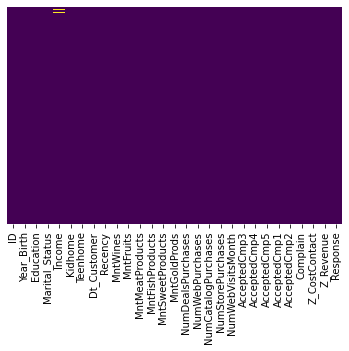

In [8]:
# Memeriksa kolom-kolom yang hilang
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='viridis');

In [9]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [10]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [11]:
df.duplicated().sum()

0

**Result**<br>
Dari deskriptif statistik dapat beberapa informasi :
- Tipe data didominasi oleh data numeric
- Terdapat 24 baris nilai null pada kolom Income
- Dari nilai unique data kolom ID hanya menunjukan nomor identitas pada setiap customer terlihat dari jumlah unique nya sama dengan jumlah row yang ada
- Terdapat data yang aneh pada kolom income dimana nilai maximum mencapai ~600,000
- Pada kolom year_birth terdapat keanehan pada nilai minimum yang ekstrem
- Terdapat beberapa kolom yang familiar yaitu pada kolom dengan nama Mnt, Num, Accepted.
- Kolom Z_ mempunyai indikasi konstanta karena tidak ada perubahan pada setiap deskripsi statistiknya
- Kolom Accepted memiliki type numeric tetapi hanya memiliki nilai 0 dan 1 sehingga merupakan data categorical binarybbbb

**Homework Questions**
- Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?
    - Dt_customer tipe datanya kurang sesuai
- Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
    - kolom income memiliki null value
- Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq) 
    - terdapat beberapa kolom yang memiliki type numeric tetapi merupakan tipe binary yaitu kolom Accepted, complain, dan response terlihat dari nilai quartiles yang 0
    - kolom Z_ memiliki nilai konstant dilihat dari min, max, dan quartiles yang memiliki nilai sama

### Univariate

In [12]:
#Untuk visualisasi univariate kita pisahkan beberapa kolom yang memiliki karakteristik yang sama
demo = ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome','Teenhome', 'Dt_Customer']
mnt = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
num_activity = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
etc = ['Recency','Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

#### Demographic column

In [13]:
demo_cat = [ 'Education', 'Marital_Status', 'Kidhome','Teenhome']
demo_num = ['Year_Birth','Income']

#Untuk kolom Dt_Customer karena kita coba buat countplot tapi dengan line style,
#karena lineplot butuh x dan y axes kita bikin dulu groupby

df_date = df.groupby('Dt_Customer')['ID'].count().reset_index()
df_date.head()

,Dt_Customer,ID
0,2012-07-30,1
1,2012-07-31,1
2,2012-08-01,4
3,2012-08-02,3
4,2012-08-03,5


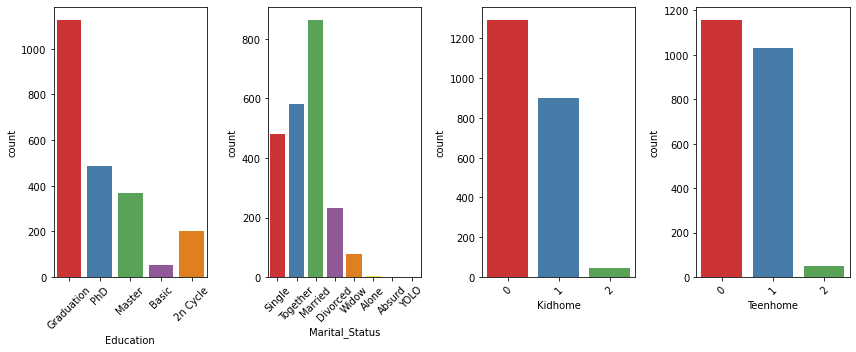

In [14]:
fig, ax = plt.subplots(1,4,figsize=(12,5))

for i in range(0,len(demo_cat)):
  sns.countplot(data=df,x=demo_cat[i],ax=ax[i],palette='Set1')
  ax[i].tick_params(axis='x', rotation=45)

# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Chart comment**<br>
1. Education
    - Kategori pendidikan terdiri dari beberapa level termasuk 'Graduation', 'PhD', 'Master', '2n Cycle', 'Basic', dan 'Unknown'.
    - Kategori 'Graduation' mendominasi di antara kategori pendidikan lainnya.
2. Marital_Status
    - Kategori status pernikahan terdiri dari beberapa jenis diantaranya 'Married', 'Single', 'Divorced', 'Together', 'Widow', dan 'Alone'.
    - Kategori 'Married' dan 'Together' adalah yang paling umum.
3. Kidhome
    - Pada kolom ini menunjukkan jumlah anak di dalam sebuah keluarga.
    - Mayoritas suatu keluarga dalam dataset tidak memiliki anak (nilai 0).
4. Teenhome
    - Kolom ini menunjukkan jumlah remaja yang ada dalan suatu keluarga.
    - Mayoritas suatu keluarga dalam dataset tidak memiliki remaja (nilai 0).

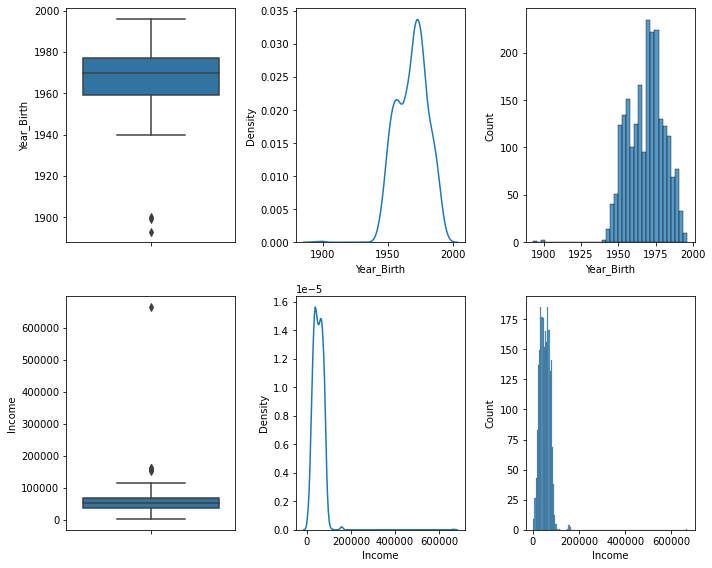

In [15]:
fig, ax = plt.subplots(2,3,figsize=(10,8))

for i in range(0,len(demo_num)):
  sns.boxplot(data=df,y=demo_num[i],ax=ax[i,0])
  sns.kdeplot(data=df,x=demo_num[i],ax=ax[i,1])
  sns.histplot(data=df,x=demo_num[i],ax=ax[i,2])
plt.tight_layout()
plt.show()

**Chart comment**<br>
1. Year_Birth
    - Distribusi tahun kelahiran terlihat cukup normal dengan sedikit kemiringan negatif (skewed).
    - Distribusi yang menjadi puncak di sekitar tahun 1970-1980
2. Income
    - Distribusi pendapatan terlihat cenderung condong ke kanan (positively skewed).
    - Terdapat beberapa outlier di sebelah kanan yang menunjukkan adanya pendapatan yang sangat tinggi.

#### Mnt Columns

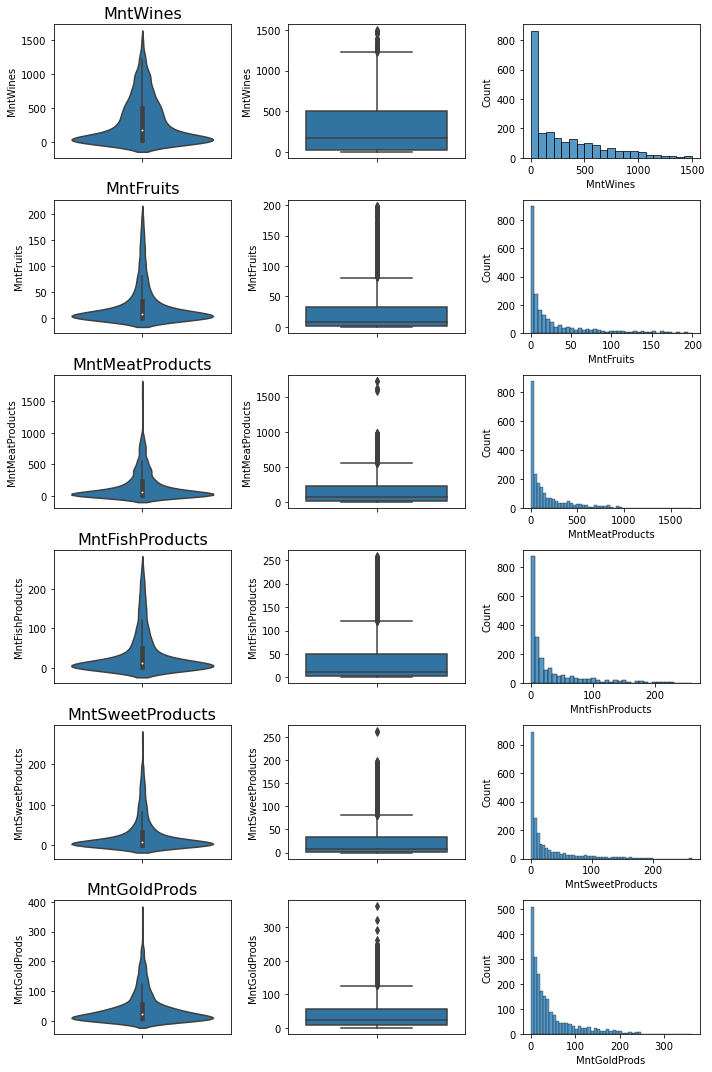

In [16]:
def plot_num(a):
    fig, ax = plt.subplots(len(a),3,figsize=(10,15))
    for i in range(0,len(a)):
        sns.violinplot(data=df,y=a[i],ax=ax[i,0])
        ax[i,0].set_title(f'{a[i]}',fontsize=16)
        
        sns.boxplot(data=df,y=a[i],ax=ax[i,1])
        sns.histplot(data=df,x=a[i],ax=ax[i,2])
    plt.tight_layout()
    plt.show()
    
plot_num(mnt)

**Chart comment**<br>
- pada kelompok kolom Mnt memiliki distribusi yang familiar dengan positive skewed

#### Num_activity column

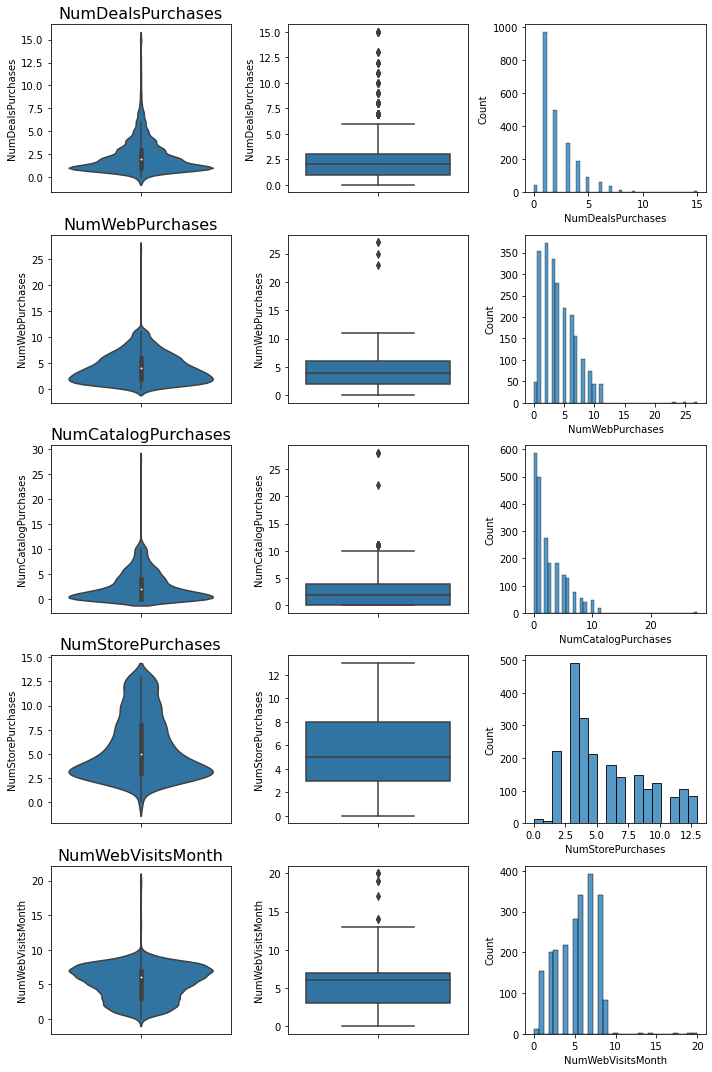

In [17]:
plot_num(num_activity)

**Chart comment**<br>
- Pada kelompok kolom Num memiliki karakter distribusi yang variatif, sehingga dapat diketahui aktivitas pada bisnis berbeda-beda

#### etc column

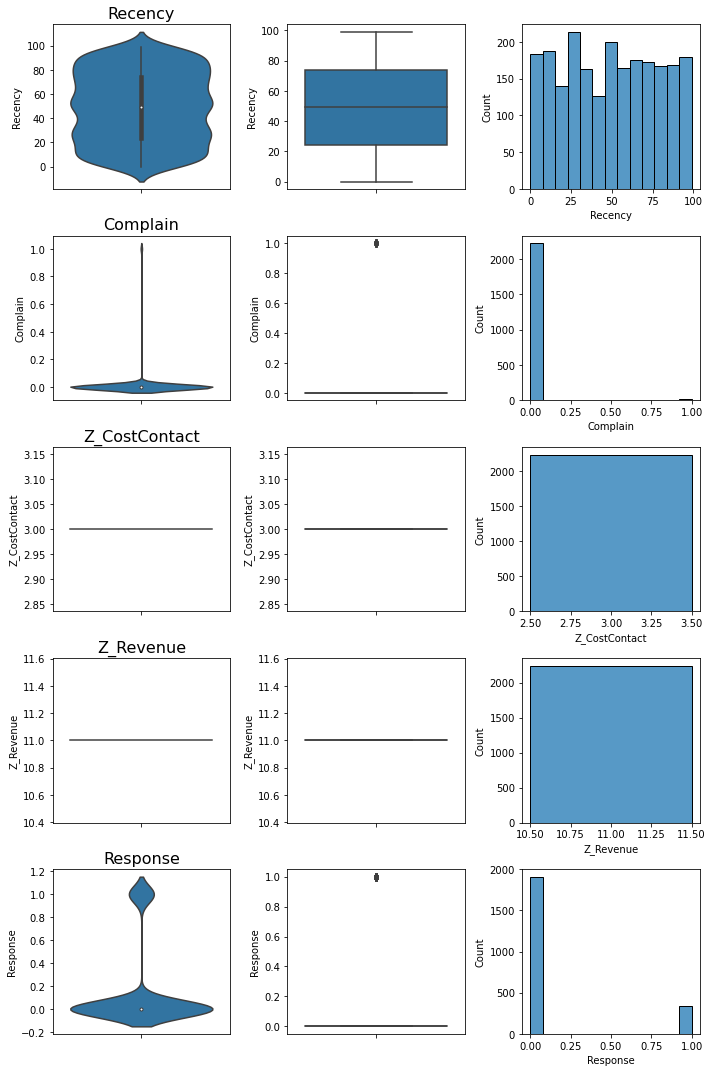

In [18]:
plot_num(etc)

**Chart comment**<br>
1. Recency
    - Distribusi Recency jumlah hari sejak pembelian terlihat cukup normal dengan sedikit "kemiringan positif (skewed)".
    - Tidak ada nilai yang mendominasi atau outlier yang mencolok pada Recency.
2. Complain
    - pada kolom Complain dapat diketahui customer cenderung tidak memberikan komplain
3. Z_ column
    - kolom Z_ dapat terlihat dengan jelas jika kolom tersebut merupakan konstanta
4. Response
    - kolom Response memiliki ketidak seimbangan pada nilainya, yang cenderung tidak memberika response(0).


**Tindakan pada saat pre-processing**<br>
Berikut dibawah ini adalah beberapa tindakan yang dapat diambil saat melakukan data preprocessing:

- Untuk kolom 'Education', dapat dilakukan pengelompokan kategori baru yang spesifik ke dalam kategori yang lebih umum untuk mengurangi jumlah kategori yang terlalu banyak.
- Pada kolom 'Income' dan 'MntWines', perlu dilakukan penanganan outlier dan normalisasi data agar distribusi menjadi lebih normal.
- Kolom 'Z_CostContact' dan 'Z_Revenue' dapat dihapus karena tidak terlalu memberikan informasi yang penting dalam analisis.
- Untuk kolom dengan kategori yang tidak seimbang seperti 'Marital_Status' dan 'Response', dapat dilakukan teknik pengelompokan atau pengurangan kategori agar distribusi menjadi lebih seimbang.
- Perlu dilakukan pengecekan dan penanganan terhadap missing values, duplikasi data, dan penyimpangan data lainnya yang mungkin ada dalam dataset.

### Multivariate 

#### Correlation Heatmap

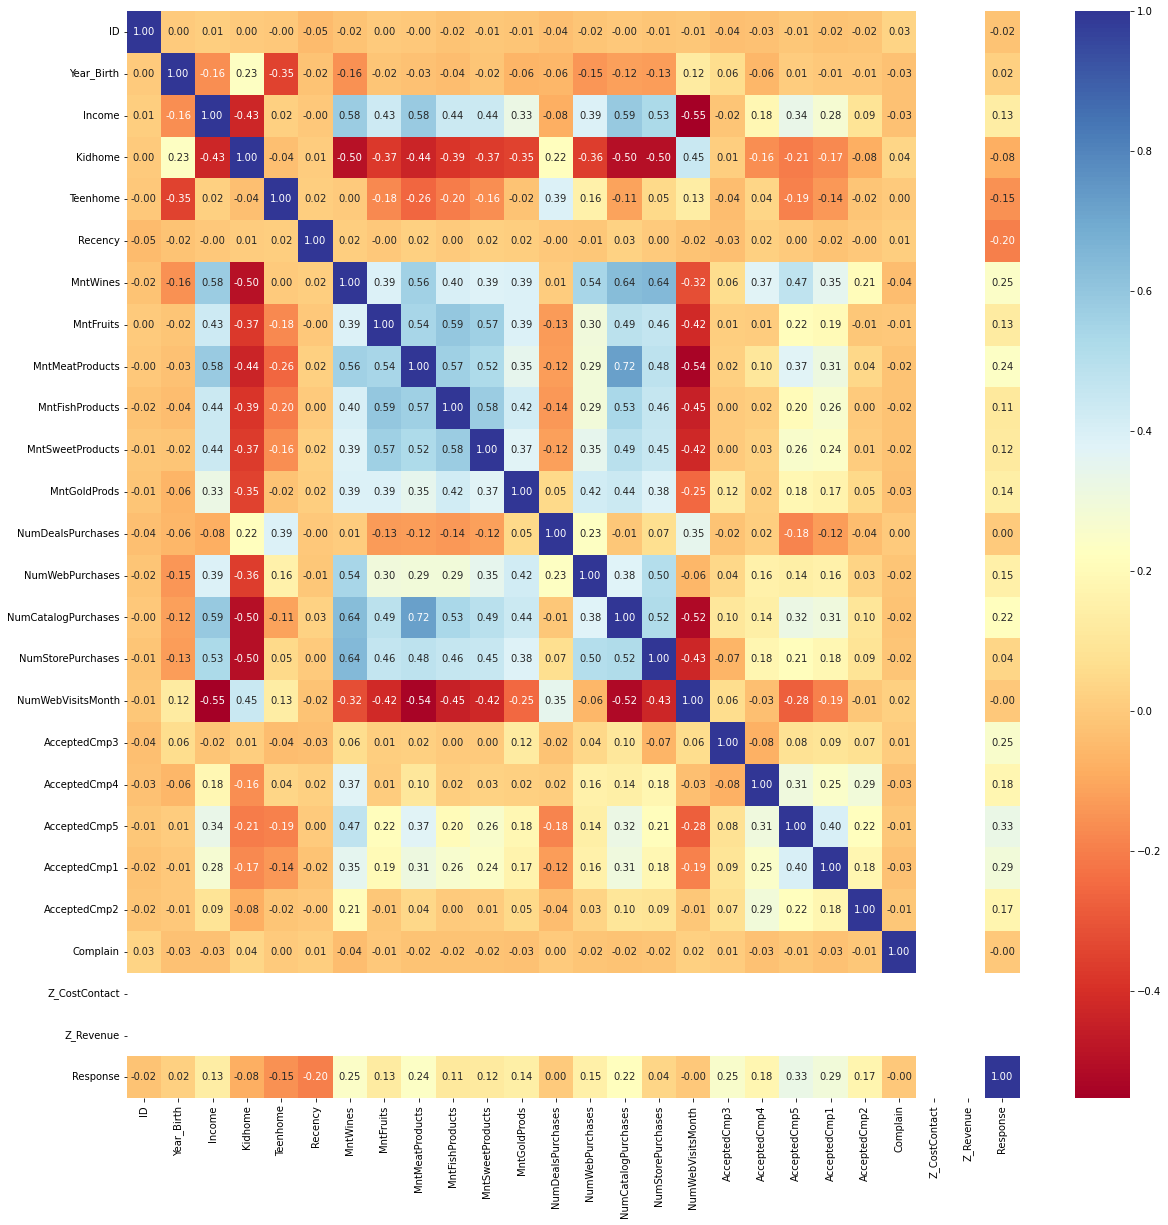

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap='RdYlBu', annot=True, fmt='.2f')
plt.show()
# plt.savefig('corr.png')

**Chart comment**<br>
- Dari Korelasi heatmap didapatkan insight dalam kolom Z_CostContact dan Z_Revenue tidak berpengaruh dalam fitur. dan terdapat korelasi yang lebih dari 0,7 yaitu korelasi antara kolom MntMeatProducts dan NumCatalogPurchases.
- Korelasi terhadap Response mayoritas memiliki korelasi rendah

#### Persentase Response

In [20]:
# Menghitung jumlah kemunculan nilai 0 dan 1 pada kolom Response
value_counts = df['Response'].value_counts()

# Menghitung persentase kemunculan nilai 0 dan 1
percentage_0 = (value_counts[0] / len(df)) * 100
percentage_1 = (value_counts[1] / len(df)) * 100

percentage_0 = round(percentage_0, 2)
percentage_1 = round(percentage_1, 2)

# Menampilkan hasil
print("Persentase nilai yang tidak menerima respon marketing:", percentage_0, '%')
print("Persentase nilai menerima respon marketing:", percentage_1, '%')

Persentase nilai yang tidak menerima respon marketing: 85.09 %
Persentase nilai menerima respon marketing: 14.91 %


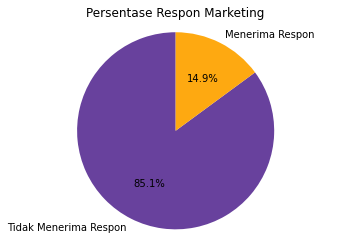

<Figure size 432x288 with 0 Axes>

In [21]:
labels = ['Tidak Menerima Respon', 'Menerima Respon']
sizes = [percentage_0, percentage_1]
colors = ['#ff9999', '#66b3ff']

plt.pie(sizes, labels=labels, colors=['#68419d','#fea911'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Persentase Respon Marketing')
plt.show()
plt.savefig('pie.png')

**Response Column (target)**<br>
- Dari chart dapat terlihat dengan jelas ketidak seimbangan pada data target yaitu response

#### AcceptedCmp terhadap Response

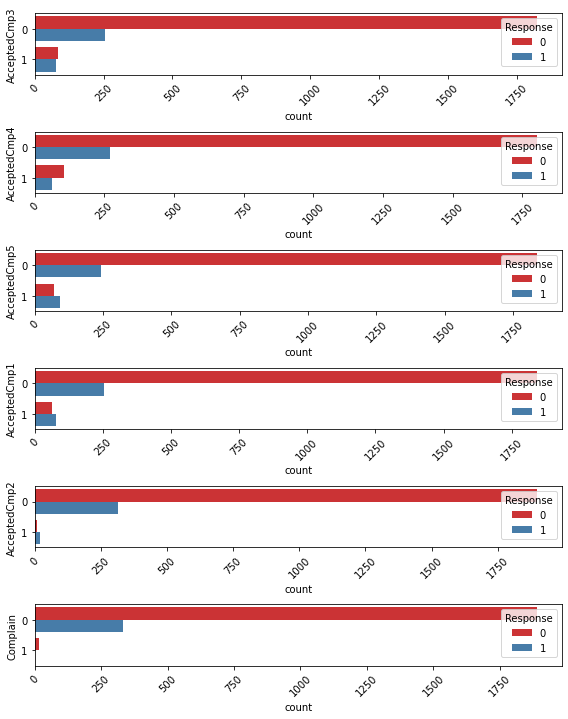

In [22]:
col2 = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain']
fig, ax = plt.subplots(6,1,figsize=(8,10))
a=0
b=0
for i in range(0,6):
    sns.countplot(data=df,y=col2[i],ax=ax[i],palette='Set1',hue='Response')
    ax[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [23]:
# Mengambil subset dari DataFrame yang hanya berisi kolom "AcceptedCmp1" hingga "AcceptedCmp5"
subset = df[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]]
count_menerima = subset.sum().reset_index(name="Count_Menerima")
count_tidak_menerima = (subset == 0).sum().reset_index(name="Count_TidakMenerima")
count_table = pd.concat([count_menerima, count_tidak_menerima["Count_TidakMenerima"]], axis=1)
count_table.columns = ["Model Campaign", "Terima", "Tidak Menerima"]
count_table["Presentase Terima"] = (count_table["Terima"] / len(df)) * 100
count_table["Presentase Tidak Menerima"] = (count_table["Tidak Menerima"] / len(df)) * 100
count_table

,Model Campaign,Terima,Tidak Menerima,Presentase Terima,Presentase Tidak Menerima
0,AcceptedCmp1,144,2096,6.428571,93.571429
1,AcceptedCmp2,30,2210,1.339286,98.660714
2,AcceptedCmp3,163,2077,7.276786,92.723214
3,AcceptedCmp4,167,2073,7.455357,92.544643
4,AcceptedCmp5,163,2077,7.276786,92.723214


**AcceptedCmp chart and data comment**<br>
1. AcceptedCmp columns
    - Pada setiap campaign memiliki bergam persentase beragam pada respon, campaign dengan persentase respon tertinggi dimiliki campaign2 tetapi memiliki accept terkecil diantara yang lain. Campaign lainnya yang memiliki dampak cukup signifikan > 50% yaitu pada Campaign1 dan Campaign5.

2. Complain
    - Pada data complain Respon terlihat jelas cenderung positif pada customer tanpa complain

#### Demographic columns terhadap Response

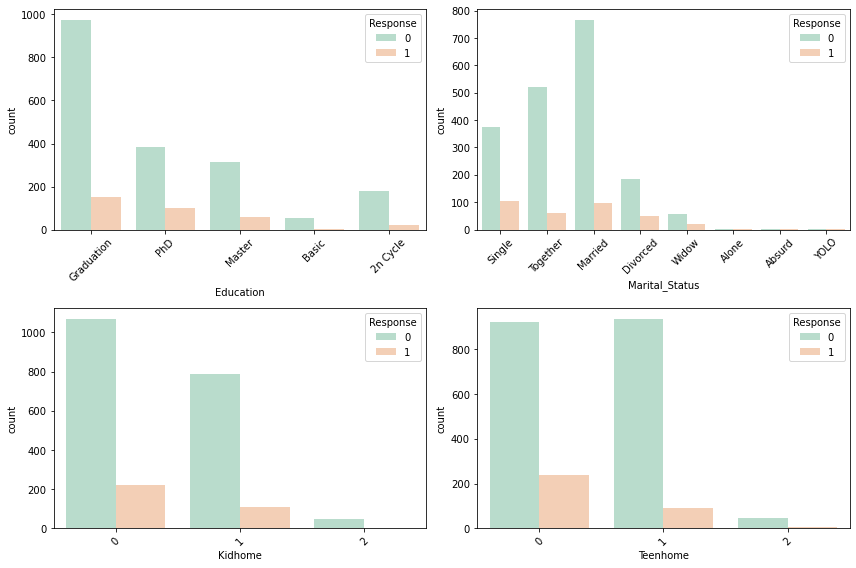

In [24]:
col1 = ['Education', 'Marital_Status','Kidhome','Teenhome']
fig, ax = plt.subplots(2,2,figsize=(12,8))
a=0
b=0
for i in col1:
    sns.countplot(data=df,x=i,ax=ax[a,b],palette='Pastel2',hue='Response')
    ax[a,b].tick_params(axis='x', rotation=45)
    b += 1
    if b == 2:
        a += 1
        b = 0
plt.tight_layout()
plt.show()


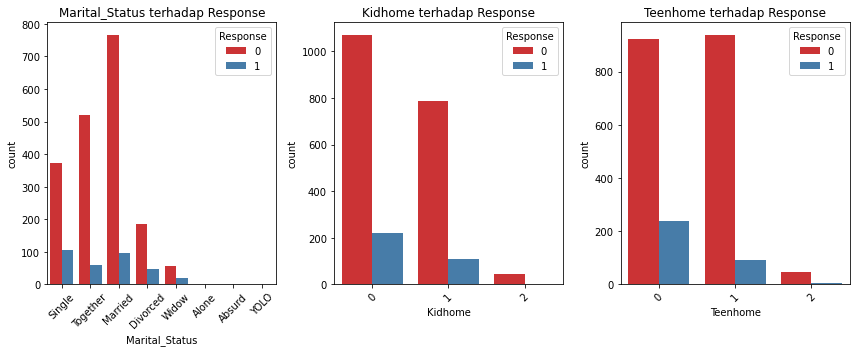

In [25]:
col1 = ['Marital_Status','Kidhome','Teenhome']
fig, ax = plt.subplots(1,3,figsize=(12,5))
a=0
b=0
for i in range(0,3):
    sns.countplot(data=df,x=col1[i],ax=ax[i],palette='Set1',hue='Response')
    ax[i].tick_params(axis='x', rotation=45)
    ax[i].set_title(f"{col1[i]} terhadap Response")

plt.tight_layout()
plt.show()


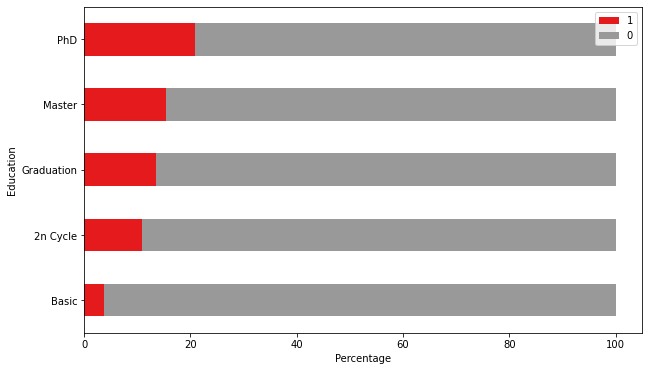

In [26]:
cross_tab_prop = pd.crosstab(index=df['Education'],
                             columns=df['Response'],
                             normalize="index")
val_0 = cross_tab_prop[0]
val_1 = cross_tab_prop[1]
ind = cross_tab_prop.index
cross_tab_prop = pd.DataFrame({'1':val_1,'0':val_0},index=ind)
cross_tab_prop = cross_tab_prop.sort_values(by='1')
cross_tab_prop_ = cross_tab_prop.copy()
cross_tab_prop_['1'] = round(cross_tab_prop_['1']*100,2)
cross_tab_prop_['0'] = round(cross_tab_prop_['0']*100,2)
cross_tab_prop_.plot(kind='barh', 
                    stacked=True, 
                    colormap='Set1', 
                    figsize=(10, 6))

# plt.legend(loc="upper left", ncol=2)
# plt.annotate(cros['1'][0],(0,0.1))
plt.xlabel("Percentage")
plt.ylabel("Education")
plt.show()

In [27]:
#Table response percentage function
#presentasi merupakan presentasi dari seluruh data response dari kolom
def table_ratio(x):
    ed_uniq = df[x].unique()
    res_0 = []
    res_1 = []
    for i in ed_uniq:
        dft_0 = df[(df[x]==i) & (df['Response']==0)].shape[0]
        dft_1 = df[(df[x]==i) & (df['Response']==1)].shape[0]
        res_0.append(dft_0)
        res_1.append(dft_1)
    df_edu = pd.DataFrame({str(x):ed_uniq,'0':res_0,'1':res_1})
    df_edu['percent(1)'] = round(df_edu['1']/(df_edu['1'].sum()+df_edu['0'].sum())*100,2)
    df_edu = df_edu.sort_values(by='percent(1)',ascending=False)
    return df_edu

for i in col1:
    print(table_ratio(i))
    print('')

  Marital_Status    0    1  percent(1)
0         Single  374  106        4.73
2        Married  766   98        4.38
1       Together  520   60        2.68
3       Divorced  184   48        2.14
4          Widow   58   19        0.85
5          Alone    2    1        0.04
6         Absurd    1    1        0.04
7           YOLO    1    1        0.04

   Kidhome     0    1  percent(1)
0        0  1071  222        9.91
1        1   789  110        4.91
2        2    46    2        0.09

   Teenhome    0    1  percent(1)
0         0  921  237       10.58
1         1  938   92        4.11
2         2   47    5        0.22



**Demographic chart and data comment**<br>
1. Education
    - Pada kolom Education terdapat beberapa group yang cenderung menerima respon dari campaign yaitu pada Graduation,PhD dan Master dengan presentasi respon > 1%
2. Marital_Status
    - Pada kolom Marital beberapa grup yang cederung menerima response adalah Single, Married, Together,Divorced dengan presentasi respon > 1%
3. Kidhome
    - Pada kolom Kidhome terdapat korelasi negatif semakin sedikit anak maka semakin tinggi presentasi response
4. Teenhome
    - Pada kolom Kidhome terdapat korelasi negatif semakin sedikit anak maka semakin tinggi presentasi response

#### Mnt Columns terhadap Response

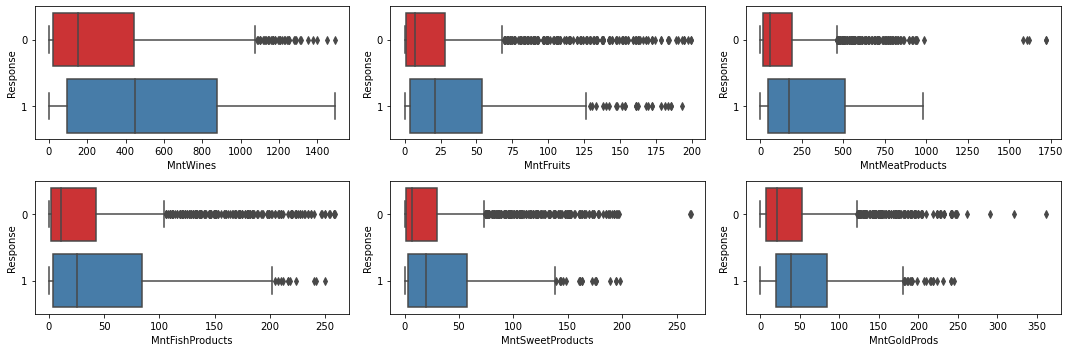

In [28]:
col2 = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
fig, ax = plt.subplots(2,3,figsize=(15,5))
df_=df.copy()
df_['Response'] = df_['Response'].astype('category')
a=0
b=0
for i in col2:
    sns.boxplot(data=df_,x=i,y='Response',ax=ax[a,b],palette='Set1')
    b += 1
    if b == 3:
        a += 1
        b = 0

plt.tight_layout()
plt.show()

**Mnt chart and data comment**<br>
1. Mnt columns
    - Pada kelompok kolom ini terdapat perbedaan distribusi terhadap response dimana penerima response memiliki nilai Mnt atau spend yang lebih tinggi dari pada yang tidak merespon

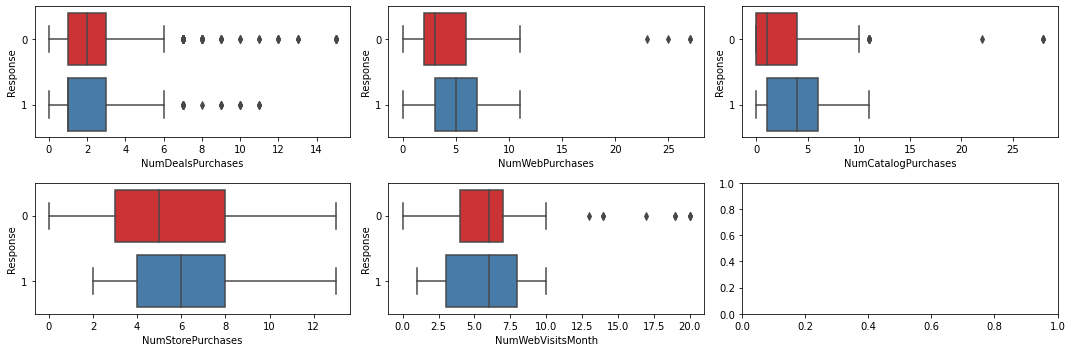

In [29]:
col3 = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
fig, ax = plt.subplots(2,3,figsize=(15,5))
a=0
b=0
for i in col3:
    sns.boxplot(data=df_,x=i,y='Response',ax=ax[a,b],palette='Set1')
    b += 1
    if b == 3:
        a += 1
        b = 0

plt.tight_layout()
plt.show()

**Mnt chart and data comment**<br>
1. Nums columns
    - Pada kelompok kolom ini terdapat beberapa perbedaan pada setia kolomnya pada kolom NumWebPurchases, NumCatalogPurchases,NumWebVisitsMonth memiliki distribusi yang signifikan terhadap response, sedangkan pada kolom NumDealsPurchases, NumStorePurchases tidak ada perbedaan yang signifikan

### Business Insight

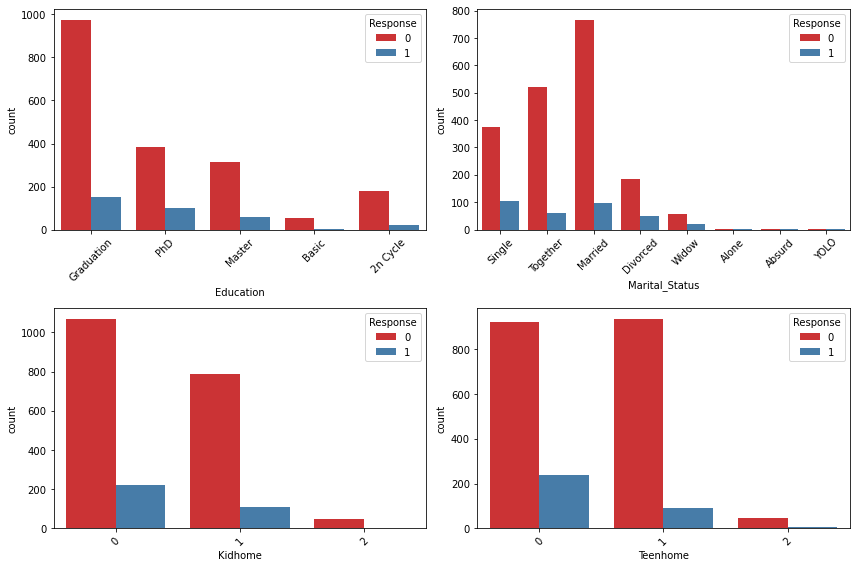

In [30]:
col1 = ['Education', 'Marital_Status','Kidhome','Teenhome']
fig, ax = plt.subplots(2,2,figsize=(12,8))
a=0
b=0
for i in col1:
    sns.countplot(data=df,x=i,ax=ax[a,b],palette='Set1',hue='Response')
    ax[a,b].tick_params(axis='x', rotation=45)
    b += 1
    if b == 2:
        a += 1
        b = 0
plt.tight_layout()
plt.show()

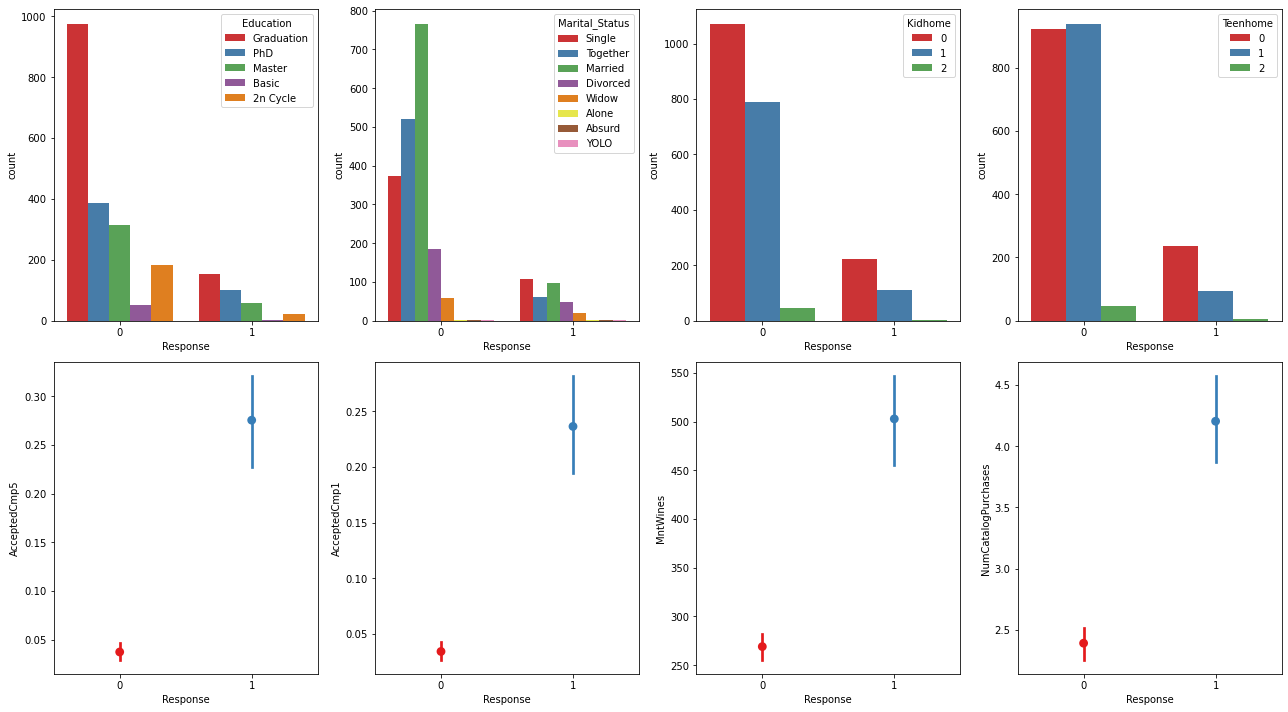

In [31]:
bi_1 = ['Education', 'Marital_Status','Kidhome','Teenhome']
bi_2 = ['AcceptedCmp5', 'AcceptedCmp1','MntWines','NumCatalogPurchases']
fig, ax = plt.subplots(2,4,figsize=(18,10))
for i in range(0,len(bi_1)):
    sns.countplot(data=df,x='Response',ax=ax[0,i],palette='Set1',hue=bi_1[i])
for i in range(0,len(bi_2)):
    sns.pointplot(data=df,y=bi_2[i],ax=ax[1,i],palette='Set1',x='Response')
plt.tight_layout()
plt.show()

**Business Insight**<br>
- Pada kolom Education customer dengan background pendidikan Graduation,PhD,Master memiliki tingkat response yang tinggi sehingga dengan mentargetkan campaign pada parameter tersebut dapat meningkatkan conversion rate.
- Pada kolom Marital terdapat beberapa kelompok yang memiliki respon yang tinggi sehingga perlu disegmentasi lebih lanjut untuk mendapatkan target yang lebih terfokus untuk meningkatkan respon
- Pada kolom Kidhome dan Teenhome memiliki korelasi negatif sehingga mentargetkan customer dengan jumlah Kidhome dan Teenhome < 2 dapat meningkatkan response customer
- Dari segi jenis campaign yang memiliki tingkat respon yang tinggi, campaign 1 dan 5 dapat menjadi opsi untuk meningkatkan conversion rate pada campaign selanjutnya
- Pada segi jumlah pembelian terdapat perbedaan yang jelas pada jenis produk Wines sehingga campaign pada target customer yang membeli produk Wines dapat meningkatkan response campaign.
- Customer yang cenderung response memiliki aktivitas yang tinggi pada pembelian Catalog sehingga dapat menjadi alternatif campaign untuk difokuskan pada aktivitas tersebut untuk meningkatkan response

# Pre-Processing (STAGE 2)

## Handle missing values

In [32]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [33]:
df.shape

(2240, 29)

In [34]:
#persentasi missing data
percent_na = (df.isna().sum().sum())/(df.shape[0])*100
print(f'{round(percent_na,2)}%')

1.07%


In [35]:
#Karena missing value sekitar 1% dari dataset kita akan drop
df = df.dropna(axis=0)

Missing value hanya terdapat pada kolom income dengan jumlah 24, nilai ini cenderung kecil dibandingkan dengan keseluruhan data (2240) sehingga diperkirakan tidak akan berpengaruh pada model. Dengan presentase 1% missing terhadap total data maka akan didrop.


## Handle duplicated data

In [36]:
df.duplicated().sum()

0

Tidak terdapat data duplicate pada dataset

## Handle outliers

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2216.0,5588.353339,3249.376275,0.0,2814.75,5458.5,8421.75,11191.0
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.00,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.00,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.00,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.00,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.00,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.00,12.0,50.00,259.0


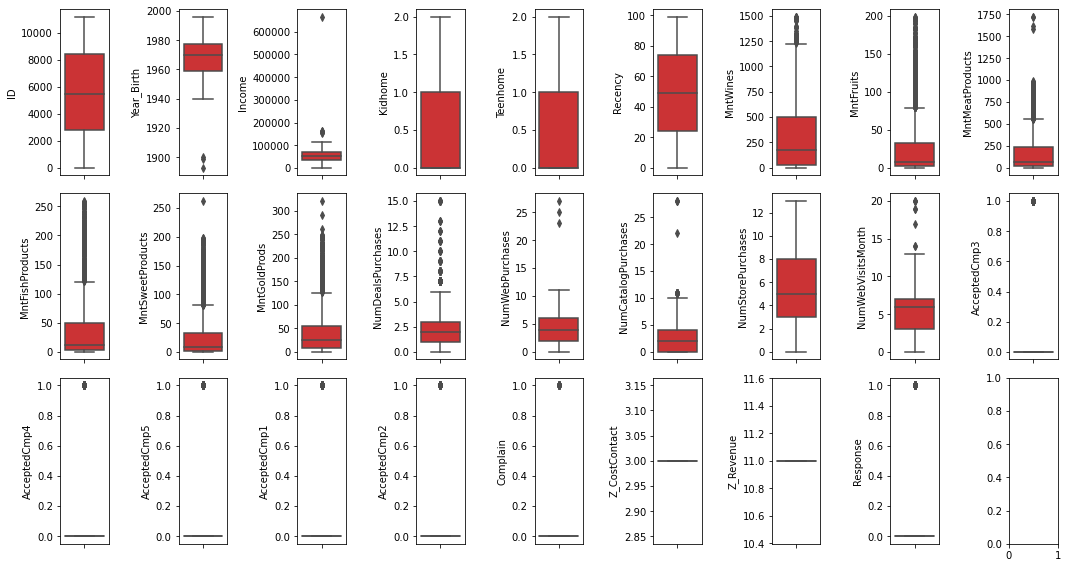

In [38]:
dft = df.copy()
num = [i for i in df.columns if df[i].dtype != 'object']

fig, ax = plt.subplots(3,9,figsize=(15,8))

a=0
b=0
for i in num:
    sns.boxplot(data=dft,y=i,ax=ax[a,b],palette='Set1')
    b += 1
    if b == 9:
        a += 1
        b = 0

plt.tight_layout()
plt.show()

In [39]:
#Terdapat outliers yang sangat ekstrem pada kolom Income dan Year_Birth sehingga akan 
#kita coba bandingkan presentase outliers dengan IQR dan Z Score

def check_outliers(x):
    global df
    q1 = df[x].quantile(0.25)
    q3 = df[x].quantile(0.75)
    iqr = q3 - q1
    low_lim = q1 - (1.5 * iqr)
    hi_lim = q3 + (1.5 * iqr)
    filterred = ((df[x]<low_lim) | (df[x]>hi_lim))
    df_out = df[filterred]
    percent_out = (df_out.shape[0])/(df.shape[0])*100
    print(f'Presentase outlier {x}:',round(percent_out,2),'%')

for i in num:
    check_outliers(i)

Presentase outlier ID: 0.0 %
Presentase outlier Year_Birth: 0.14 %
Presentase outlier Income: 0.36 %
Presentase outlier Kidhome: 0.0 %
Presentase outlier Teenhome: 0.0 %
Presentase outlier Recency: 0.0 %
Presentase outlier MntWines: 1.58 %
Presentase outlier MntFruits: 11.1 %
Presentase outlier MntMeatProducts: 7.85 %
Presentase outlier MntFishProducts: 10.02 %
Presentase outlier MntSweetProducts: 11.1 %
Presentase outlier MntGoldProds: 9.25 %
Presentase outlier NumDealsPurchases: 3.79 %
Presentase outlier NumWebPurchases: 0.14 %
Presentase outlier NumCatalogPurchases: 1.04 %
Presentase outlier NumStorePurchases: 0.0 %
Presentase outlier NumWebVisitsMonth: 0.36 %
Presentase outlier AcceptedCmp3: 7.36 %
Presentase outlier AcceptedCmp4: 7.4 %
Presentase outlier AcceptedCmp5: 7.31 %
Presentase outlier AcceptedCmp1: 6.41 %
Presentase outlier AcceptedCmp2: 1.35 %
Presentase outlier Complain: 0.95 %
Presentase outlier Z_CostContact: 0.0 %
Presentase outlier Z_Revenue: 0.0 %
Presentase outlie

Karena outliers mayoritas dibawah 1% maka kita akan menggunakan Zscore untuk handling outliers. Kolom Response kita exclude karena merupakan target dan kolom AcceptedCmp dan Complain yang merupakan categorical

In [40]:
#Handling outliers pada beberapa kolom dengan Zscoe
num_outlier = ['Year_Birth','Income','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
               'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases', 
               'NumWebVisitsMonth']
df_before = df[num_outlier].copy() #DataFrame Sebagai perbandingan

outliers_ = [num_outlier] #List outliers

def zscore_handling(x):
    global df
    z_score = np.abs(stats.zscore(df[x]))
    filtered = (z_score < 3)
    df = df[filtered]

# for i in outliers_:
#     zscore_handling(i)
zscore_handling('Year_Birth')
zscore_handling('Income')

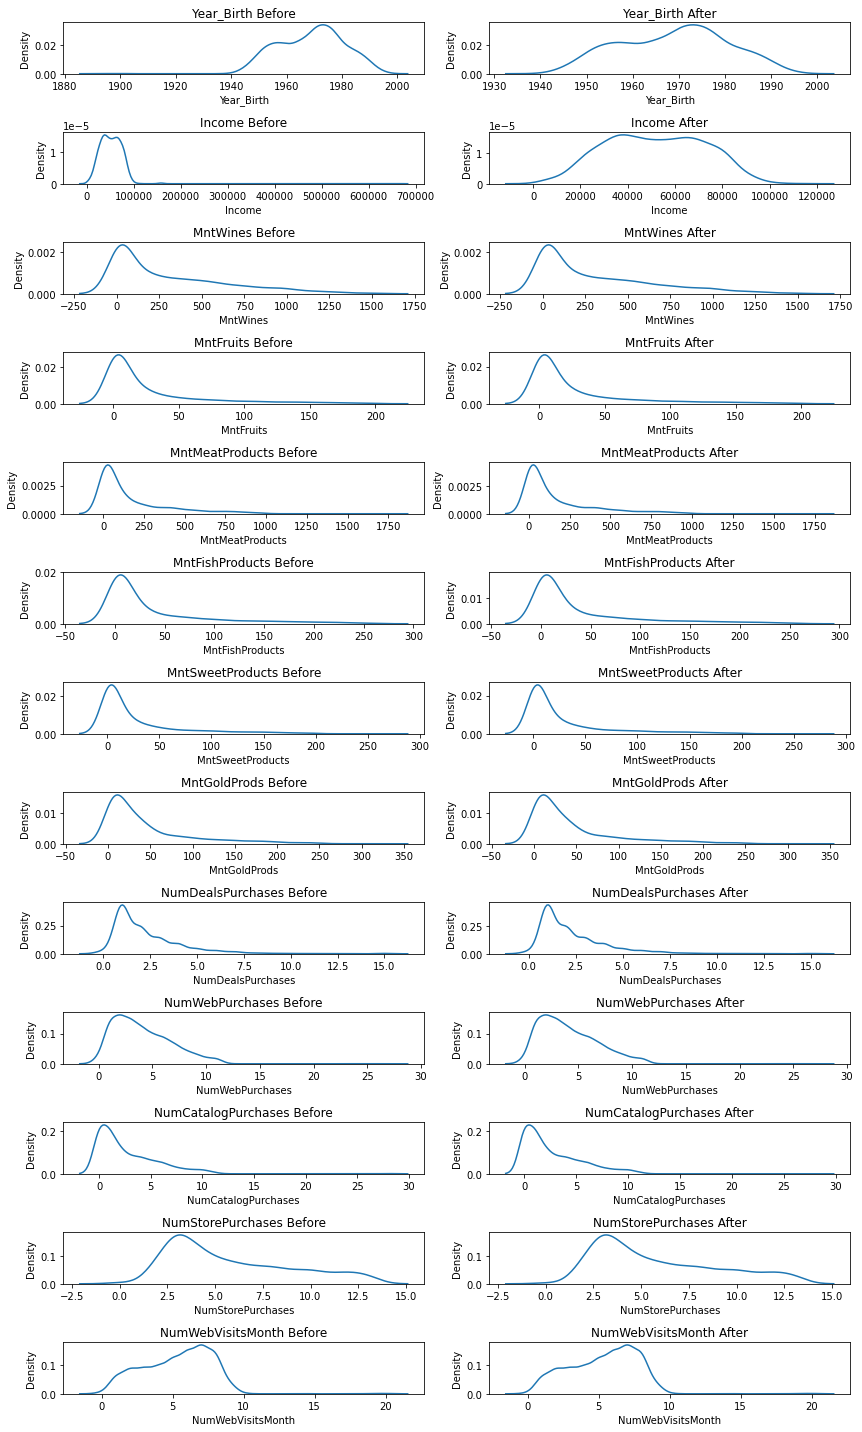

In [41]:
dft = df.copy()
num = [i for i in df.columns if df[i].dtype != 'object']

fig, ax = plt.subplots(len(num_outlier),2,figsize=(12,20))

a=0
b=0
for i in range(0,len(num_outlier)):
    # sns.boxplot(data=dft,y=i,ax=ax[a,b],palette='Set1')
    sns.kdeplot(data=df_before,x=num_outlier[i],ax=ax[i,0])
    ax[i,0].set_title(f'{num_outlier[i]} Before')
    sns.kdeplot(data=df,x=num_outlier[i],ax=ax[i,1])
    ax[i,1].set_title(f'{num_outlier[i]} After')
    b += 1
    if b == 2:
        a += 1
        b = 0

plt.tight_layout()
plt.show()

Pada beberapa kolom terlihat perbedaan distribusi yang menuju distribusi normal

## Feature encoding
Kita lakukan label encode(LE) dan One Hot Encoding(OHE) pada Education dan OHE pada Marital_Status

In [42]:
#Kriteria LE
edu = {'Basic':0,'Graduation':1,'2n Cycle':2,'Master':2,'PhD':3}

In [43]:
#OHE
cat = ['Education', 'Marital_Status']
df_OHE = pd.get_dummies(df[cat])
df = pd.concat([df,df_OHE],axis=1)

In [44]:
#LE
df['Education_LE'] = df['Education'].map(edu)
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Education_LE
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,1,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,1,0,0,0,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,1,0,0,1


## Log Transformation
Dilakukan transformasi log(x + 1), karena jika log(x) saja pada nilai values 0 akan menghasilkan nilai infinity


In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2205.0,5585.439456,3247.546423,0.0,2815.0,5455.0,8418.0,11191.0
Year_Birth,2205.0,1968.904308,11.705801,1940.0,1959.0,1970.0,1977.0,1996.0
Income,2205.0,51622.094785,20713.063826,1730.0,35196.0,51287.0,68281.0,113734.0
Kidhome,2205.0,0.442177,0.537132,0.0,0.0,0.0,1.0,2.0
Teenhome,2205.0,0.506576,0.544380,0.0,0.0,0.0,1.0,2.0
Recency,2205.0,49.009070,28.932111,0.0,24.0,49.0,74.0,99.0
MntWines,2205.0,306.164626,337.493839,0.0,24.0,178.0,507.0,1493.0
MntFruits,2205.0,26.403175,39.784484,0.0,2.0,8.0,33.0,199.0
MntMeatProducts,2205.0,165.312018,217.784507,0.0,16.0,68.0,232.0,1725.0
MntFishProducts,2205.0,37.756463,54.824635,0.0,3.0,12.0,50.0,259.0


In [46]:
#Dari boxplot sebelumnya sebaran data MntProducts terlihat positive skewed, kita lakukan log transformation
mnt_col = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds']
mnt_col_log = ['MntWines_log', 'MntFruits_log', 'MntMeatProducts_log', 'MntFishProducts_log',
                     'MntSweetProducts_log', 'MntGoldProds_log']

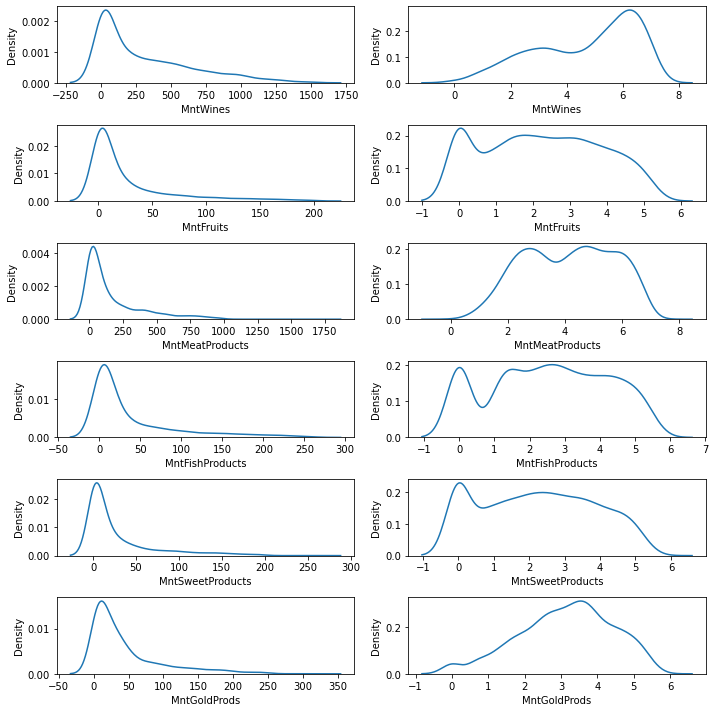

<Figure size 432x288 with 0 Axes>

In [47]:
fig, ax = plt.subplots(len(mnt_col),2,figsize=(10,10))
for i in range(0,len(mnt_col)):
    sns.kdeplot(df[mnt_col[i]],ax=ax[i,0])
    sns.kdeplot(np.log(df[mnt_col[i]]+1),ax=ax[i,1])

plt.tight_layout()
plt.show()
plt.savefig('log_trans.jpg')

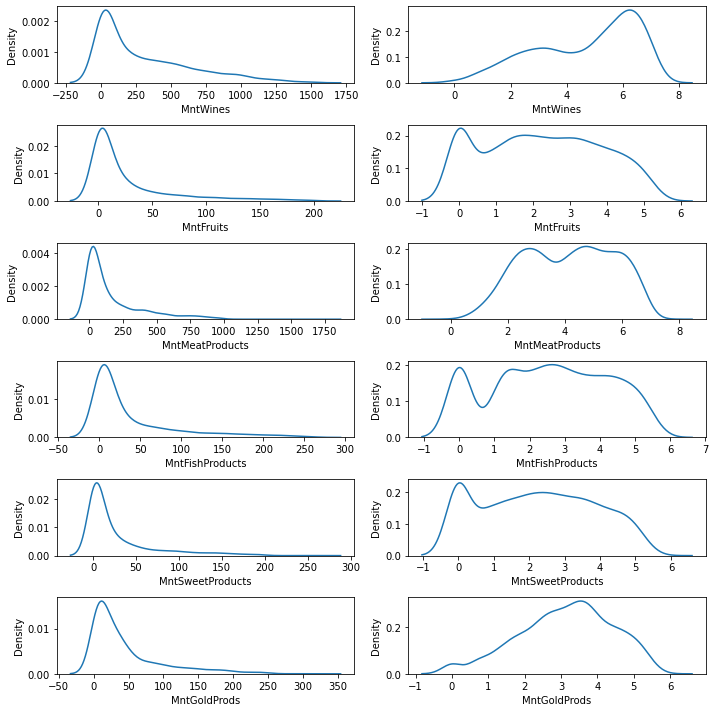

<Figure size 432x288 with 0 Axes>

In [48]:
#Transformasi log(x + 1) dengan menambahkan kolom baru
df[mnt_col_log] = np.log(df[mnt_col] + 1)

#Perbandingan sebelum log dan setelah log
def histo(x):
    fig, ax = plt.subplots(len(x),2,figsize=(10,10))
    for i in range(0,len(x)):
        sns.kdeplot(df[x[i]],ax=ax[i,0])
        sns.kdeplot(np.log(df[x[i]]+1),ax=ax[i,1])
        
    plt.tight_layout()
    plt.show()
    plt.savefig('log_trans.png')
histo(mnt_col)

In [49]:
#Transformasi log(x + 1) dengan menambahkan kolom baru
df[mnt_col_log] = np.log(df[mnt_col] + 1)

In [50]:
df[mnt_col + mnt_col_log].describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntWines_log,MntFruits_log,MntMeatProducts_log,MntFishProducts_log,MntSweetProducts_log,MntGoldProds_log
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,4.686567,2.247012,4.131120,2.542396,2.247480,3.128769
std,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.801605,1.569506,1.554547,1.658386,1.592604,1.283472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,3.218876,1.098612,2.833213,1.386294,0.693147,2.302585
50%,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,5.187386,2.197225,4.234107,2.564949,2.197225,3.258097
75%,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,6.230481,3.526361,5.451038,3.931826,3.555348,4.043051
max,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,7.309212,5.298317,7.453562,5.560682,5.572154,5.774552


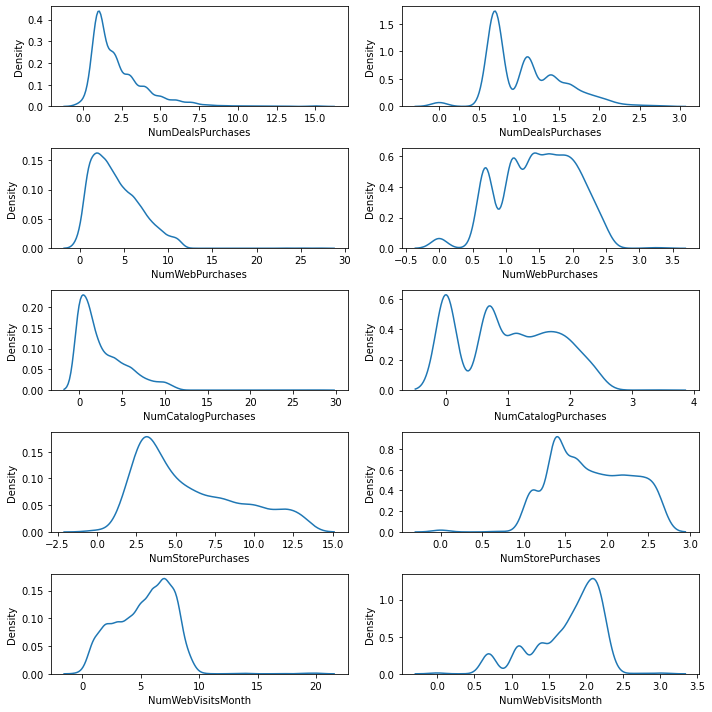

<Figure size 432x288 with 0 Axes>

In [51]:
#Dari boxplot sebelumnya sebaran data NumPurchases terlihat positive skewed, kita lakukan coba lakukan log transformation
num_col = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
histo(num_col)

Num columns tidak kita lakukan log transformation karena cenderung tidak terlalu skewed

## Normalization
Kita aplikasikan Normalizaton kepada semua numerical kolom kecuali kolom Year_Birth,Kidhome,Teenhome, dan family Num columns yang akan kita lakukan Feature extraction terlebih dahulu

In [52]:
#Copy data untuk normalisasi dan cek correlation
df_check = df.copy()

In [53]:
# num_col_norm = ['NumDealsPurchases_norm', 'NumWebPurchases_norm', 'NumCatalogPurchases_norm', 'NumStorePurchases_norm',
#                  'NumWebVisitsMonth_norm']
# df[num_col_norm] = df[num_col]

norm_col = [i for i in df_check.columns if df_check[i].dtype != 'object']
for i in norm_col:
    df_check[i] = MinMaxScaler().fit_transform(df_check[i].values.reshape(len(df_check),1))
    
# exceptions_ = ['Year_Birth','Kidhome','Teenhome'] + num_col + mnt_col
# for i in exceptions_:
#     norm_col.remove(i)



In [54]:
df_check = df_check.drop(columns=['Z_CostContact','Z_Revenue'])
plt.figure(figsize=(30,30))
# sns.heatmap(df_check.corr(), cmap='RdYlBu', annot=True, fmt='.2f')
plt.show()

<Figure size 2160x2160 with 0 Axes>

## Feature extraction

**Ini hanya gambaran aja ya guys**<br>
- Kolom Year_Birth dapat kita ubah menjadi kolom age untuk memudahkan pengamatan
- Kolom Kidhome dan Teenhome dapat kita transformasi menjadi kolom child karena kedua kolom ini memeliki hubungan yang sama terhadap response
- Kolom monetary dari kolom Mnt family
- Kolom frequency dari kolom Num family

In [55]:
#Check apakah Kolom memiliki keterikatan seperti jika Teenhome > 0 maka Kidhome != 0
df[(df['Kidhome']==0) & (df['Teenhome']!=0)].head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Education_LE,MntWines_log,MntFruits_log,MntMeatProducts_log,MntFishProducts_log,MntSweetProducts_log,MntGoldProds_log
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,1,0,0,2,6.255750,3.761200,4.595120,0.000000,3.761200,2.708050
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,0,0,0,1,5.463832,4.189655,5.105945,3.931826,3.912023,3.332205
18,6565,1949,Master,Married,76995.0,0,1,2013-03-28,91,1012,...,0,0,0,2,6.920672,4.394449,6.212606,0.000000,2.833213,5.176150


In [56]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [57]:
def couple(x):
    if x in ['Single','Together', 'Married', 'Divorced', 'Widow']:
        return 1
    else :
        return 0

In [58]:
df['couple'] = df['Marital_Status'].map(lambda x: couple(x))

In [59]:
#Buat kolom baru childs
df['childs'] = df['Kidhome'] + df['Teenhome']

#Drop kolom Kidhome dan Teenhome
# df = df.drop(columns=['Kidhome','Teenhome'], axis=1)

In [60]:
#Buat kolom age
df['age'] = 2020 - df['Year_Birth']

#Drop kolom Year_Birth
# df = df.drop(columns='Year_Birth', axis=1)

In [61]:
#Kolom baru
df['monetary'] = df["MntFishProducts"] + df["MntFruits"] + df["MntGoldProds"] + df["MntMeatProducts"] + df["MntSweetProducts"] + df["MntWines"]
df['frequency'] = df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"] + df["NumWebVisitsMonth"] + df["NumDealsPurchases"]
df['total_cmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']  


In [62]:
#kolom dependencies no dependent(0) if marital 'Single', 'Together', 'Married', 'Divorced', 'Widow' and children 0
filter1 = df['childs'] == 0
filter2 = df['Marital_Status'].isin(['Single', 'Divorced', 'Widow','Alone','Absurd','YOLO'])
df['dependencies'] = np.where((filter1 & filter2), 0,1)

In [63]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts_log,MntSweetProducts_log,MntGoldProds_log,couple,childs,age,monetary,frequency,total_cmp,dependencies
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,5.153292,4.488636,4.488636,1,0,63,1617,32,0,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1.098612,0.693147,1.945910,1,2,66,27,11,0,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4.718499,3.091042,3.761200,1,0,55,776,25,0,1
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,2.397895,1.386294,1.791759,1,1,36,53,14,0,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3.850148,3.332205,2.772589,1,1,39,422,24,0,1


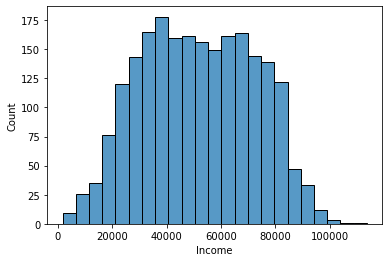

In [64]:
#Binning Income 
sns.histplot(df['Income'])
plt.show()

In [65]:
#Kita bagi income menjadi 3 kategori low, medium, high berdasarkan quantile

def income_cat(x):
    if x < df['Income'].quantile(0.3):
        return 1
    elif x < df['Income'].quantile(0.6):
        return 2
    else :
        return 3
df['income_cat'] = df['Income'].map(lambda x: income_cat(x))

## Correlation check

In [66]:
df_check = df.copy()
norm_col = [i for i in df_check.columns if df_check[i].dtype != 'object']
for i in norm_col:
    df_check[i] = MinMaxScaler().fit_transform(df_check[i].values.reshape(len(df_check),1))

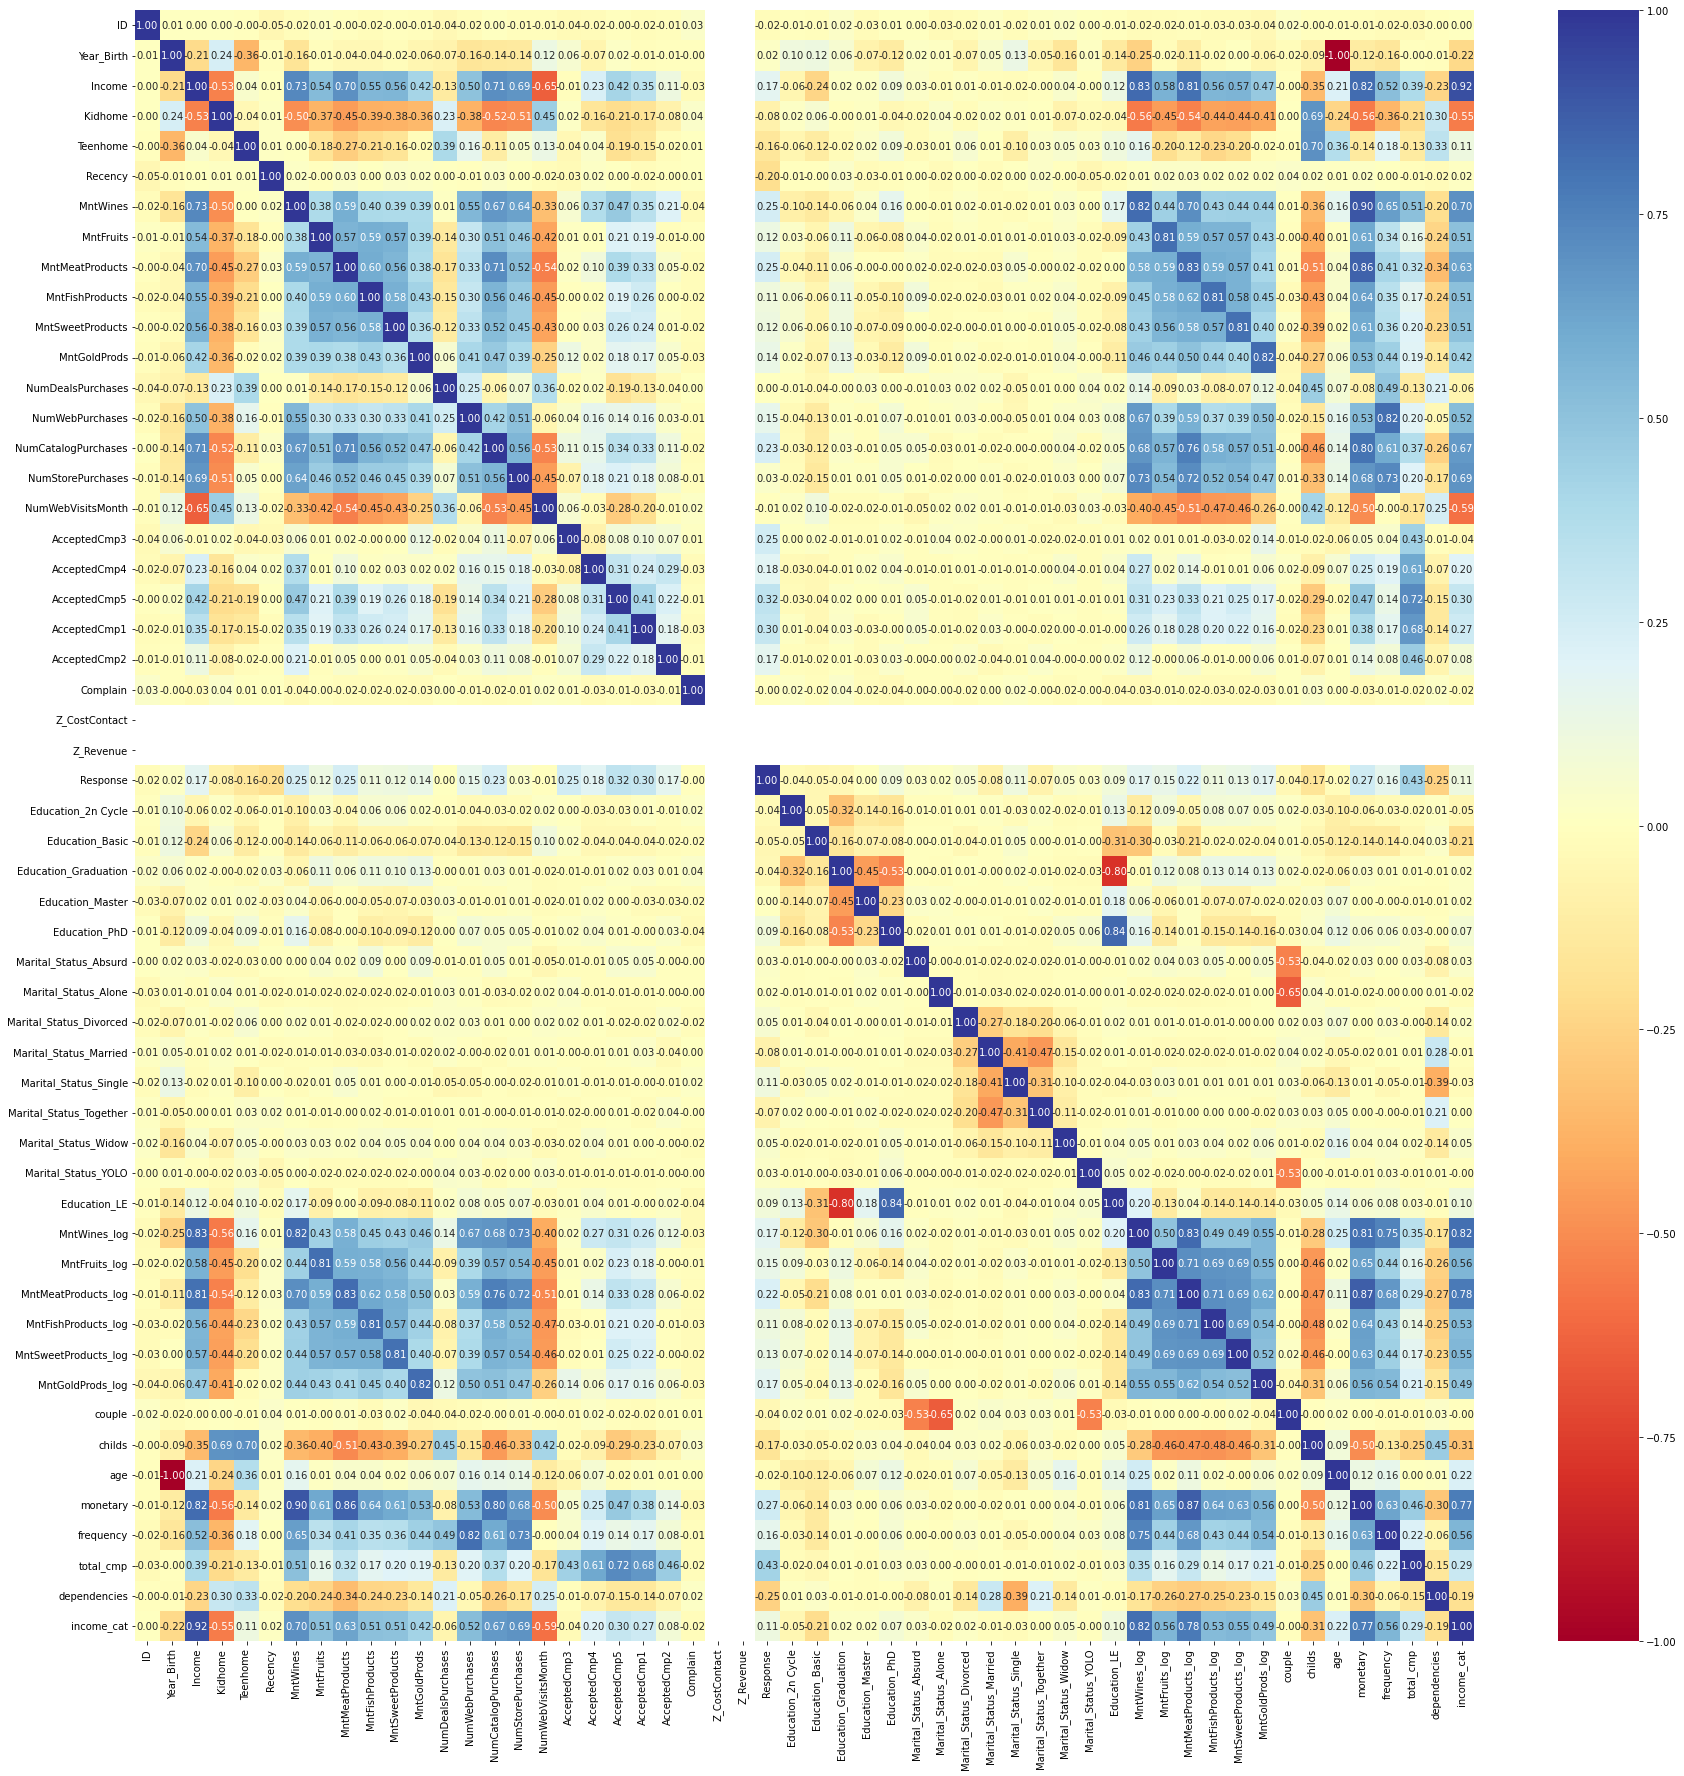

<Figure size 432x288 with 0 Axes>

In [67]:
# df_check = df_check.drop(columns=['Z_CostContact','Z_Revenue'])
plt.figure(figsize=(30,30))
sns.heatmap(df_check.corr(), cmap='RdYlBu', annot=True, fmt='.2f')
plt.show()
plt.savefig('corr2.jpg')

Terdapat beberapa improvement pada korelasi dengan adanya feature extraction :
- pada kolom childs memiliki korelasi -0.17 terhadap response sedangkan kolom pembentuknya hanya memiliki -0.15 da -0.08
- pada kolom monetary memiliki korelasi 0.27 terhadap response sedangkan korelasi pada famili kolom Mnt memiliki korelasi tertinggi pada 0.25
- pada kolom frequency memiliki korelasi 0.16 sedangkan korelasi pada famili kolom Num memiliki korelasi tertinggi pada 0.23 
- pada kolom age tidak terjadi perbedaan yang signifikan terhadap kolom pembentuknya 
- total cmp memiliki korelasi 0.43 terhadap target sedangkan famili kolom AccCmp memiliki korelasi tertinggi pada 0.32
- kolom income_cat memiliki korelasi lebih rendah dari kolom income
- kolom dependencies memiliki korelasi -0.2 lebih tinggi dari semua kolom OHE pada marital status

## Feature Selection
- kolom ID kita drop karena tidak relevan terhadap target
- kolom Z_CostContact dan Z_Revenue kita drop karena merupakan konstanta yang tidak mempengaruhi target

In [68]:
print(df.columns)

#Data for Evaluation
df_eval = df.copy()
# df.sample(5)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'Education_LE', 'MntWines_log', 'MntFruits_log',
       'MntMeatProducts_log', 'MntFishProducts_log', 'MntSweetProducts_log',
       'MntGoldProds_log', 'coup

In [69]:
#picked columns
pick_col= ['age','Income','MntWines_log', 'MntFruits_log','MntMeatProducts_log', 'MntFishProducts_log', 
           'MntSweetProducts_log',  'MntGoldProds_log','Recency','NumWebPurchases','NumCatalogPurchases','childs','total_cmp', 
           'Education_LE','dependencies' ,'frequency','Response']
# pick_col= ['age','Income','total_cmp', 'Recency','Kidhome','Teenhome',
#            'MntWines_log', 'MntFruits_log','MntMeatProducts_log', 'MntFishProducts_log',  'MntSweetProducts_log',  'MntGoldProds_log',
#            'NumWebPurchases','NumCatalogPurchases','NumDealsPurchases','NumStorePurchases', 'NumWebVisitsMonth',
#            'Education_2n Cycle', 'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD',
#            'couple',
#            'Response']
len(pick_col)

17

In [70]:
norm_col = [i for i in df.columns if df[i].dtype != 'object']
for i in norm_col:
    df[i] = MinMaxScaler().fit_transform(df[i].values.reshape(len(df),1))

## Handle class imbalance
Kita akan gunakan imblearn SMOTE untuk menyeimbangkan data target

In [71]:
df_pick = df[pick_col]
X = df_pick.copy()
X = X.reset_index()
X = X.drop(columns='index')
y = X.pop('Response')

In [72]:
df_pick.shape

(2205, 17)

In [73]:
random_data = df_pick.sample(n=2240,replace=True)
random_data

,age,Income,MntWines_log,MntFruits_log,MntMeatProducts_log,MntFishProducts_log,MntSweetProducts_log,MntGoldProds_log,Recency,NumWebPurchases,NumCatalogPurchases,childs,total_cmp,Education_LE,dependencies,frequency,Response
452,0.446429,0.308025,0.370498,0.207351,0.460718,0.395136,0.197161,0.240070,0.171717,0.074074,0.000000,0.333333,0.00,0.666667,1.0,0.150,0.0
1921,0.428571,0.617853,0.725564,0.994251,0.619183,0.692388,0.937832,0.904961,0.575758,0.222222,0.071429,0.333333,0.00,0.666667,1.0,0.475,0.0
15,0.892857,0.723813,0.946030,0.591791,0.637761,0.736303,0.759869,0.663020,0.232323,0.259259,0.214286,0.000000,0.50,1.000000,0.0,0.575,1.0
489,0.785714,0.238625,0.440386,0.130824,0.629410,0.611651,0.610392,0.468963,0.969697,0.148148,0.035714,0.000000,0.00,0.666667,0.0,0.300,0.0
1505,0.392857,0.548873,0.905899,0.414702,0.648855,0.446871,0.394322,0.570752,0.656566,0.148148,0.107143,0.000000,0.25,0.666667,1.0,0.250,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,0.125000,0.254893,0.328065,0.303764,0.363323,0.289432,0.288836,0.120035,0.131313,0.037037,0.000000,0.333333,0.00,0.333333,1.0,0.175,0.0
1967,0.589286,0.674047,0.882296,0.714225,0.735305,0.873960,0.779556,0.535287,0.292929,0.222222,0.285714,0.333333,0.00,0.333333,1.0,0.625,0.0
1195,0.500000,0.554543,0.883159,0.523296,0.619183,0.547509,0.373185,0.845572,0.646465,0.333333,0.107143,0.333333,0.00,0.666667,1.0,0.550,0.0
1816,0.250000,0.507589,0.820736,0.676350,0.626926,0.831728,0.781872,0.651341,0.151515,0.333333,0.071429,0.333333,0.25,0.666667,1.0,0.525,0.0


In [74]:
52.12-14.9

37.22

In [75]:
random_data.duplicated().sum()

891

In [76]:
# #Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,train_size=0.7)

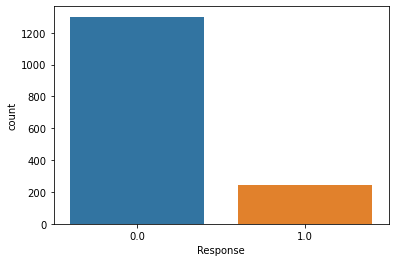

In [77]:
sns.countplot(y_train)
plt.show()

In [78]:
#kolom Dt_Customer akan kita drop karena tidak bisa digunakan untuk SMOTE dan juga tidak memiliki korelasi terhadap target
# X = X.drop(columns='Dt_Customer', axis=1) #drop karena tidak releval dengan target 

#Handling Imbalance
X_SMOTE, y_SMOTE = over_sampling.SMOTE(random_state=457).fit_resample(X_train,y_train)
X_ADASYN, y_ADASYN = over_sampling.ADASYN(random_state=457).fit_resample(X_train,y_train)
X_SMOTENC, y_SMOTENC = over_sampling.SMOTENC(random_state=457,categorical_features=[13,14]).fit_resample(X_train,y_train)

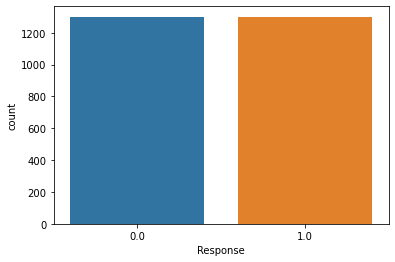

In [79]:
sns.countplot(y_SMOTE)
plt.show()

# Modelling & Evaluation (STAGE 3)
Karena metric project ini merupakan untuk meningkatkan Conversion Rate sehinga dibutuhkan True Positive tinggi dan False Negative rendah sehingga metric untuk pengukuran model yang terbaik adalah Recall.

## Split Data

In [80]:
#Train Data
X_train = X_SMOTE
y_train = y_SMOTE

## Modelling

In [81]:
def cm_model(x):
    x.fit(X_train, y_train)
    
    pre_train = x.predict(X_train)
    cm_train = confusion_matrix(y_train, pre_train, labels=x.classes_)
    
    pre_test = x.predict(X_test)
    cm_test = confusion_matrix(y_test, pre_test, labels=x.classes_)
    
    return cm_train,cm_test
def cm_plot(x):
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_model(x)[0],
                          display_labels=x.classes_)
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_model(x)[1],
                          display_labels=x.classes_)
    
    fig, ax = plt.subplots(1,2,figsize=(10,4))
    disp_train.plot(ax=ax[0])
    disp_test.plot(ax=ax[1])
    ax[0].set_title('train')
    ax[0].text(0,0.2,'TN')
    ax[0].text(1,0.2,'FP')
    ax[0].text(0,0.8,'FN')
    ax[0].text(1,0.8,'TP')
                
    ax[1].set_title('test')
    ax[1].text(0,0.2,'TN')
    ax[1].text(1,0.2,'FP')
    ax[1].text(0,0.8,'FN')
    ax[1].text(1,0.8,'TP')
    plt.tight_layout()
    plt.show()
    
def cv_prec(x,model):
    score_accu = cross_validate(x, X_train,y_train, cv=5, scoring='accuracy', return_train_score=True)
    score_prec = cross_validate(x, X_train,y_train, cv=5, scoring='precision', return_train_score=True)
    
    train_precision = [round(score_prec['train_score'].mean(),4)]
    test_precision = [round(score_prec['test_score'].mean(),4)]
    
    train_accuracy = [round(score_accu['train_score'].mean(),4)]
    test_accuracy = [round(score_accu['test_score'].mean(),4)]
    
    
    cv_df = pd.DataFrame({'model':model,'cv_train_precision':train_precision,'cv_test_precision':test_precision,
                         'cv_train_accuracy':train_accuracy,'cv_test_accuracy':test_accuracy})
    return cv_df

def eval_model(x,model):
    x.fit(X_train,y_train)
    pre_train = x.predict(X_train)
    precision_train = precision_score(y_train, pre_train)
    accuracy_train = accuracy_score(y_train, pre_train)
    
    pre_test = x.predict(X_test)
    precision_test = precision_score(y_test, pre_test)
    accuracy_test = accuracy_score(y_test, pre_test)
    cv_df = pd.DataFrame({'model':model,'precision_train':[round(precision_train,4)],'precision_test':[round(precision_test,4)],
                         'accuracy_train':[round(accuracy_train,4)],'accuracy_test':[round(accuracy_test,4)]})

    return cv_df


### LogisticRegression

In [82]:
LR = LogisticRegression(random_state=42)

#Crossvalidate score
cv_lr = cv_prec(LR,'LogisticRegression')
cv_lr

,model,cv_train_precision,cv_test_precision,cv_train_accuracy,cv_test_accuracy
0,LogisticRegression,0.8066,0.8067,0.8046,0.8044


In [83]:
#Evaluation Train and Test
df_eval_lr = eval_model(LR,'LogisticRegression')
df_eval_lr

,model,precision_train,precision_test,accuracy_train,accuracy_test
0,LogisticRegression,0.8085,0.4048,0.8082,0.8142


### RandomForestClassifier

In [84]:
RF = RandomForestClassifier(random_state=0)

#Crossvalidate score
cv_rf = cv_prec(RF,'RandomForestClassifier')
cv_rf

,model,cv_train_precision,cv_test_precision,cv_train_accuracy,cv_test_accuracy
0,RandomForestClassifier,0.9946,0.9229,0.9958,0.9312


In [85]:
#Evaluation Train and Test
df_eval_rf = eval_model(RF,'RandomForestClassifier')
df_eval_rf

,model,precision_train,precision_test,accuracy_train,accuracy_test
0,RandomForestClassifier,0.9954,0.5104,0.995,0.8656


### DecisionTreeClassifier

In [86]:
DT = DecisionTreeClassifier(random_state=0)

#Crossvalidate score
cv_dt = cv_prec(DT,'DecisionTreeClassifier')
cv_dt

,model,cv_train_precision,cv_test_precision,cv_train_accuracy,cv_test_accuracy
0,DecisionTreeClassifier,0.9994,0.8685,0.9958,0.8793


In [87]:
#Evaluation Train and Test
df_eval_dt = eval_model(DT,'DecisionTreeClassifier')
df_eval_dt

,model,precision_train,precision_test,accuracy_train,accuracy_test
0,DecisionTreeClassifier,0.9992,0.3047,0.995,0.787


### XGBClassifier

In [88]:
XG = XGBClassifier(random_state=0)

#Crossvalidate score
cv_xg = cv_prec(XG,'XGBClassifier')
cv_xg

,model,cv_train_precision,cv_test_precision,cv_train_accuracy,cv_test_accuracy
0,XGBClassifier,0.995,0.926,0.9958,0.9193


In [89]:
#Evaluation Train and Test
df_eval_xg = eval_model(XG,'XGBClassifier')
df_eval_xg

,model,precision_train,precision_test,accuracy_train,accuracy_test
0,XGBClassifier,0.9946,0.5584,0.995,0.8761


### LGBMClassifier

In [90]:
LG = LGBMClassifier(random_state=0)

#Crossvalidate score
cv_lg = cv_prec(LG,'LGBMClassifier')
cv_lg

,model,cv_train_precision,cv_test_precision,cv_train_accuracy,cv_test_accuracy
0,LGBMClassifier,0.9948,0.9263,0.9958,0.9197


In [91]:
#Evaluation Train and Test
df_eval_lg = eval_model(LG,'LGBMClassifier')
df_eval_lg

,model,precision_train,precision_test,accuracy_train,accuracy_test
0,LGBMClassifier,0.9931,0.4742,0.995,0.855


## Model Evaluation

Karena metric project ini merupakan untuk meningkatkan Conversion Rate sehinga dibutuhkan True Positive tinggi dan False Negative rendah sehingga metric untuk pengukuran model yang terbaik adalah Precision.

In [92]:
all_cv = pd.concat([cv_lr,cv_rf,cv_dt,cv_xg,cv_lg],axis=0)
#Buat kolom precision difference
all_cv['precision_diff'] = abs(all_cv['cv_train_precision']-all_cv['cv_test_precision'])
all_cv = all_cv.sort_values(by=['cv_train_precision','cv_test_precision'],ascending=[False,False])
all_cv = all_cv.set_index('model')

#highlight function
def highlight(x):
    if x['cv_train_precision'] in all_cv['cv_train_precision'].sort_values()[-3:].to_list():
        return ['background-color: yellow']*x.shape[0]
    else:
        return ['background-color: white']*x.shape[0]
all_cv.style.apply(highlight, axis=1)

,cv_train_precision,cv_test_precision,cv_train_accuracy,cv_test_accuracy,precision_diff
model,,,,,
DecisionTreeClassifier,0.999400,0.868500,0.995800,0.879300,0.130900
XGBClassifier,0.995000,0.926000,0.995800,0.919300,0.069000
LGBMClassifier,0.994800,0.926300,0.995800,0.919700,0.068500
RandomForestClassifier,0.994600,0.922900,0.995800,0.931200,0.071700
LogisticRegression,0.806600,0.806700,0.804600,0.804400,0.000100


In [93]:
#Concate semua Evaluation score dari model
all_eval = pd.concat([df_eval_lr,df_eval_rf,df_eval_dt,df_eval_xg,df_eval_lg],axis=0)
#Buat kolom precision difference
all_eval['precision_diff'] = abs(all_eval['precision_train']-all_eval['precision_test'])
all_eval = all_eval.sort_values(by=['precision_train','precision_test'],ascending=[False,False])
all_eval = all_eval.set_index('model')

#highlight function
def highlight(x):
    if x['precision_train'] in all_eval['precision_train'].sort_values(ascending=False)[1:4].to_list():
        return ['background-color: yellow']*5
    else:
        return ['background-color: white']*5
all_eval.style.apply(highlight, axis=1)

,precision_train,precision_test,accuracy_train,accuracy_test,precision_diff
model,,,,,
DecisionTreeClassifier,0.999200,0.304700,0.995000,0.787000,0.694500
RandomForestClassifier,0.995400,0.510400,0.995000,0.865600,0.485000
XGBClassifier,0.994600,0.558400,0.995000,0.876100,0.436200
LGBMClassifier,0.993100,0.474200,0.995000,0.855000,0.518900
LogisticRegression,0.808500,0.404800,0.808200,0.814200,0.403700


Dari data evaluasi model di atas kita pilih model terbaik dengan menggunakan precision diff untuk mendapatkan model yang best fit. 3 model terbaik untuk case ini adalah DecisionTreeClassifier, RandomForestClassifier, XGBClassifier selanjutnya akan kita lakukan Hyperparameter tuning.

## Hyperparameter tuning

### LGBMClassifier hyperparameter tuning

In [94]:
# Define the hyperparameter grid
param_grid_lg = {
    'num_leaves': list(range(20,50,10)),
    'n_estimators': list(range(100,600,100)),
    'objective': ['binary'],
    'min_child_samples':list(range(20,50,10))
}

In [95]:
# Perform GridSearchCV
gs_lg = GridSearchCV(LG, param_grid_lg, cv=5,scoring='precision')
gs_lg.fit(X_train,y_train)

# Get the best parameters and the best score
best_params_lg = gs_lg.best_params_


# Print the best parameters and the best score
print("Best Parameters: ", best_params_lg)


Best Parameters:  {'min_child_samples': 20, 'n_estimators': 500, 'num_leaves': 20, 'objective': 'binary'}


In [96]:
#Best model
best_LG = LGBMClassifier(random_state=0,**gs_lg.best_params_)

#Crossvalidate score
cv_best_lg = cv_prec(best_LG,'LGBMClassifier')
cv_best_lg

,model,cv_train_precision,cv_test_precision,cv_train_accuracy,cv_test_accuracy
0,LGBMClassifier,0.9946,0.9373,0.9958,0.927


In [97]:
#Evaluation Train and Test
eval_best_lg = eval_model(best_LG,'LGBMClassifier')
eval_best_lg

,model,precision_train,precision_test,accuracy_train,accuracy_test
0,LGBMClassifier,0.9946,0.5116,0.995,0.8656


### XGBClassifier hyperparameter tuning

In [98]:
# Define the parameter grid
# param_grid_xg = {
#     'n_estimators': list(range(100,1000,100)),  # Number of trees in the forest
#     'learning_rate': [0.1, 0.01, 0.001],
#     'booster':['gbtree','gblinear','dart']
# }
# Define the parameter grid
param_grid_xg = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [3, 4, 5]
}

In [99]:
# Perform grid search with cross-validation
gs_xg = GridSearchCV(estimator=XG, param_grid=param_grid_xg, cv=5,scoring='precision')

# Fit the grid search to the data
gs_xg.fit(X_train, y_train)
print("Best parameters found: ", gs_xg.best_params_)

Best parameters found:  {'max_depth': 4, 'n_estimators': 200}


In [100]:
#Best model
best_XG = XGBClassifier(random_state=0,**gs_xg.best_params_)

#Crossvalidate score
cv_best_xg = cv_prec(best_XG,'XGBClassifier')
cv_best_xg

,model,cv_train_precision,cv_test_precision,cv_train_accuracy,cv_test_accuracy
0,XGBClassifier,0.995,0.9341,0.9958,0.9209


In [101]:
#Evaluation Train and Test
eval_best_xg = eval_model(best_XG,'XGBClassifier')
eval_best_xg

,model,precision_train,precision_test,accuracy_train,accuracy_test
0,XGBClassifier,0.9946,0.4943,0.995,0.861


### RandomForestClassifier hyperparameter tuning

In [102]:
# param_grid_rf = {
#     'n_estimators': list(range(100,1000,100)),
#     'min_samples_split': list(range(2,11,1)),
#     'min_samples_leaf': list(range(2,11,1)),
#     'max_features': ['sqrt', 'log2'],
#     'class_weight' : ['balanced','balanced_subsample']
# }
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 5, 10],
    'class_weight' : ['balanced','balanced_subsample']
}

In [103]:
# Create GridSearchCV object
gs_rf = GridSearchCV(RF, param_grid_rf, cv=5,scoring='precision')

# Fit the GridSearchCV object to the data
gs_rf.fit(X_train,y_train)

# Print the best hyperparameters found
print("Best hyperparameters: ", gs_rf.best_params_)

Best hyperparameters:  {'class_weight': 'balanced', 'min_samples_split': 5, 'n_estimators': 300}


In [104]:
#Crossvalidate score
best_RF = RandomForestClassifier(random_state=0,**gs_rf.best_params_)
cv_best_rf = cv_prec(best_RF,'RandomForestClassifier')
cv_best_rf

,model,cv_train_precision,cv_test_precision,cv_train_accuracy,cv_test_accuracy
0,RandomForestClassifier,0.9954,0.9248,0.9956,0.9324


In [105]:
#Evaluation Train and Test
eval_best_rf = eval_model(best_RF,'RandomForestClassifier')
eval_best_rf

,model,precision_train,precision_test,accuracy_train,accuracy_test
0,RandomForestClassifier,0.9931,0.5161,0.9942,0.8671


### Hyperparameter evaluation

In [106]:
#Gabungkan score cv semua hyper model
cv_hyp_df = pd.concat([cv_best_rf,cv_best_xg,cv_best_lg],axis=0)

#buat kolom precision difference
cv_hyp_df['precision_diff'] = abs(cv_hyp_df['cv_train_precision']-cv_hyp_df['cv_test_precision'])
cv_hyp_df = cv_hyp_df.sort_values(by=['cv_train_precision','cv_test_precision'],ascending=[False,False])
cv_hyp_df = cv_hyp_df.set_index('model')

#Highlight function
def highlight(x):
    if x['cv_train_precision'] == cv_hyp_df['cv_train_precision'].max():
        return ['background-color: yellow']*5
    else:
        return ['background-color: white']*5

    
cv_hyp_df.style.apply(highlight, axis=1)


,cv_train_precision,cv_test_precision,cv_train_accuracy,cv_test_accuracy,precision_diff
model,,,,,
RandomForestClassifier,0.995400,0.924800,0.995600,0.932400,0.070600
XGBClassifier,0.995000,0.934100,0.995800,0.920900,0.060900
LGBMClassifier,0.994600,0.937300,0.995800,0.927000,0.057300


In [107]:
#Gabungkan semua eval score hyper model
eval_hyp_df = pd.concat([eval_best_xg,eval_best_rf,eval_best_lg],axis=0)

#buat kolom precision difference
eval_hyp_df['precision_diff'] = abs(eval_hyp_df['precision_train']-eval_hyp_df['precision_test'])
eval_hyp_df = eval_hyp_df.sort_values(by=['precision_test','precision_train'],ascending=[False,False])
eval_hyp_df = eval_hyp_df.set_index('model')
eval_hyp_df[eval_hyp_df.columns] = round(eval_hyp_df[eval_hyp_df.columns],3)
#Highlight function
def highlight(x):
    if x['precision_test'] == eval_hyp_df['precision_test'].max():
        return ['background-color: yellow']*x.shape[0]
    else:
        return ['background-color: white']*x.shape[0]

    
eval_hyp_df.style.apply(highlight, axis=1)

,precision_train,precision_test,accuracy_train,accuracy_test,precision_diff
model,,,,,
RandomForestClassifier,0.993000,0.516000,0.994000,0.867000,0.477000
LGBMClassifier,0.995000,0.512000,0.995000,0.866000,0.483000
XGBClassifier,0.995000,0.494000,0.995000,0.861000,0.500000


Dari hasil hyperparameter tuning pada 3 model, RandomForestClassifier mendapatkan hasil paling sesuai karena memiliki score yang paling tinggi , dengan nilai precision_train 0.995400 dan precision_test 0.521300.

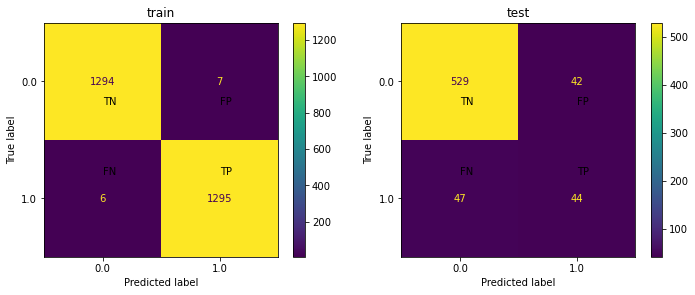

In [108]:
cm_plot(best_LG)

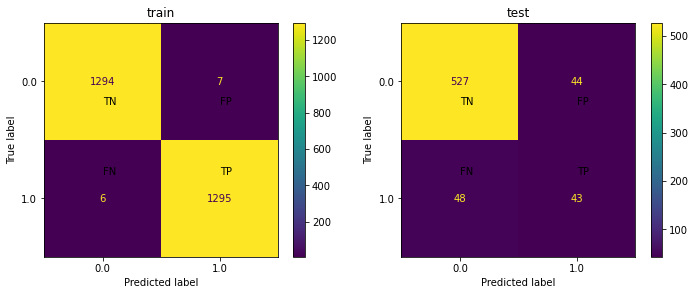

In [109]:
cm_plot(best_XG)

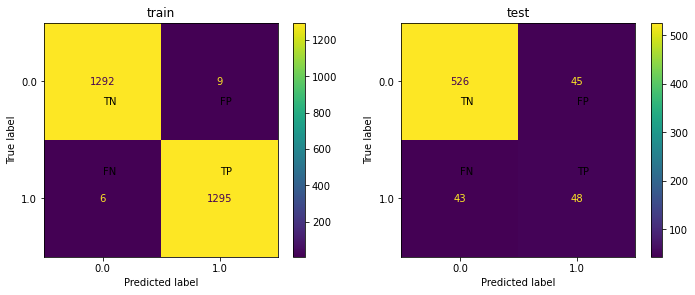

In [110]:
cm_plot(best_RF)

## Feature Importance

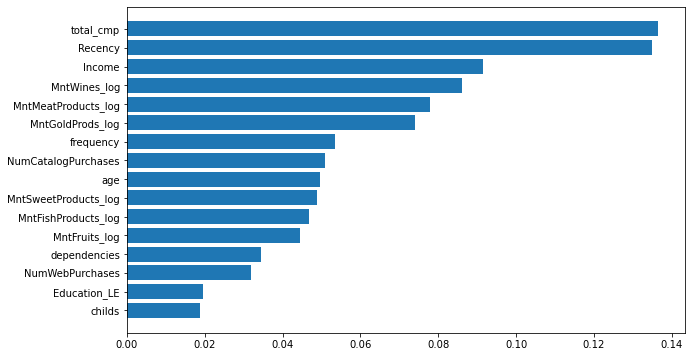

In [111]:
best_RF.fit(X,y)
# importance = best_LR.coef_[0]
importance = best_RF.feature_importances_
plt.figure(figsize=(10,6))
feature_importdf= pd.DataFrame({'feature':X.columns,'import':importance})
feature_importdf= feature_importdf.sort_values(by='import')
plt.barh(feature_importdf['feature'],feature_importdf['import'])
plt.show()

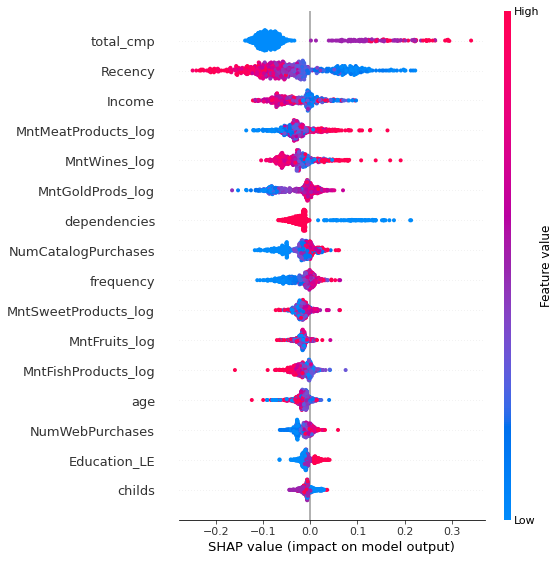

In [112]:
import shap

explainer = shap.TreeExplainer(best_RF)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)


### Insight

Dari visualiasi feature importance pada model terbaik dapat kita ketahui beberapa feature dengan dampak yang tinggi pada Response(target). Feature yang berdampak tinggi adalah Recency, total_cmp, Income.

### Rekomendasi

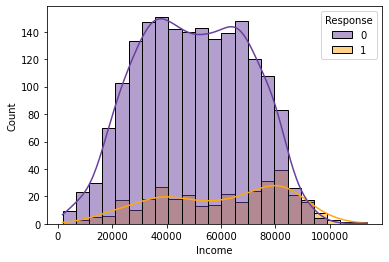

In [146]:
sns.histplot(data=df_eval,x='Income',hue='Response',kde=True,palette=['#68419d','#fea911'])
plt.show()

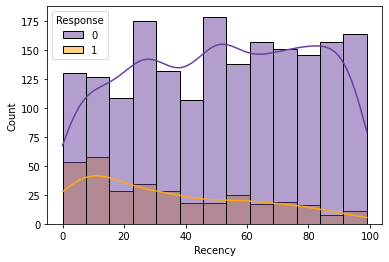

In [147]:
sns.histplot(data=df_eval,x='Recency',hue='Response',kde=True,palette=['#68419d','#fea911'])
plt.show()

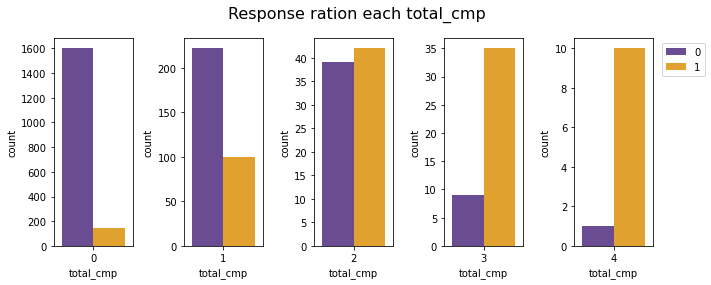

In [148]:
#Analyze total_cmp
insigth_df = df_eval.copy()
fig,ax = plt.subplots(1,(len(insigth_df['total_cmp'].unique())),figsize=(10,4))
for i in insigth_df['total_cmp'].unique():
    df = insigth_df[insigth_df['total_cmp']==i]
    sns.countplot(data=df,x='total_cmp',hue='Response',ax=ax[i],palette=['#68419d','#fea911'])
    if i != 4:
        ax[i].get_legend().remove()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.suptitle('Response ration each total_cmp',fontsize=16)
plt.tight_layout()
plt.show()

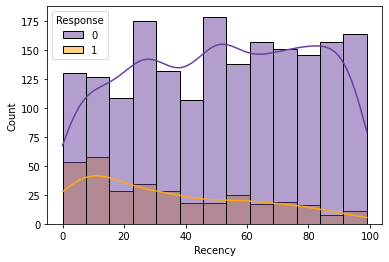

In [149]:
sns.histplot(data=df_eval,x='Recency',hue='Response',kde=True,palette=['#68419d','#fea911'])
plt.show()

In [139]:
df_cl4_.groupby(['Response'])['total_cmp', 'Recency', 'Income', 'MntMeatProducts', 'MntWines'].mean()


,total_cmp,Recency,Income,MntMeatProducts,MntWines
Response,,,,,
0,0.173233,51.369131,49842.886670,134.337831,268.138694
1,0.967638,34.310680,58229.326861,246.796117,485.537217


Rekomendasi action yang dilakukan pada next campaign adalah :
- Melakukan filter target marketing hanya pada customer yang memiliki Recency pada range sekitar 0 - 20 dan total_cmp pada jumlah cmp >=2 dan Income pada range > 70,000.
- Memberikan diskon dengan masa diskon 0 - 20 hari  agar customer terarik untuk tetap melakukan transaksi pada masa tersebut.
- Memberikan diskon pada produk Meat dan Wines untuk meningkatkan respon customer.


# Result

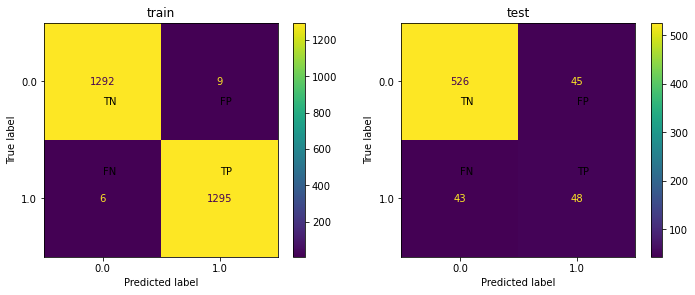

In [135]:
cm_plot(best_RF)

In [136]:
response_rate_after = 48/(48+45)*100
response_rate_after

51.61290322580645

In [137]:
cost_after = (45+48)*3
revenue_after = 48*11
profit_after = revenue_after - cost_after
profit_after

249